## 1.1 Import Packages

In [1]:
#basic packages
import os

import pandas as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
pd.set_option('display.max_columns',None)

import seaborn as sns
sns.set(style='ticks',color_codes=True,font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')



In [2]:
from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
import statsmodels.api as sm

## 1.2 Load Datsets

In [3]:
train = pd.read_csv('C:/Users/Neeraj Bhadani/PycharmProjects/Machine learning/Housing Price prediction/data/train.csv')
test = pd.read_csv('C:/Users/Neeraj Bhadani/PycharmProjects/Machine learning/Housing Price prediction/data/test.csv')

train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL       65.000     8450   Pave   NaN      Reg   
1   2          20       RL       80.000     9600   Pave   NaN      Reg   
2   3          60       RL       68.000    11250   Pave   NaN      IR1   
3   4          70       RL       60.000     9550   Pave   NaN      IR1   
4   5          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH       80.000    11622   Pave   NaN      Reg   
1  1462          20       RL       81.000    14267   Pave   NaN      IR1   
2  1463          60       RL       74.000    13830   Pave   NaN      IR1   
3  1464          60       RL       78.000     9978   Pave   NaN      IR1   
4  1465         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

In [5]:
# save Id columns
train_Id = train['Id']
test_Id = test['Id']

train.drop('Id',axis=1,inplace =True)
test.drop('Id',axis=1,inplace =True)

test['SalePrice']=0
test.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RH       80.000    11622   Pave   NaN      Reg   
1          20       RL       81.000    14267   Pave   NaN      IR1   
2          60       RL       74.000    13830   Pave   NaN      IR1   
3          60       RL       78.000     9978   Pave   NaN      IR1   
4         120       RL       43.000     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       0.000        TA        TA     CBlock       TA       TA           No   
1     108.000        TA        TA     CBlock       TA       TA           No   
2       0.000        TA        TA      PConc       Gd       TA           No   
3      20.000        TA        TA      PConc       TA       TA           No   
4       0.000        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec     468.000          LwQ     144.000    270.000      882.000   
1          ALQ     923.000          Unf       0.000    406.000     1329.000   
2          GLQ     791.000          Unf       0.000    137.000      928.000   
3          GLQ     602.000          Unf       0.000    324.000      926.000   
4          ALQ     263.000          Unf       0.000   1017.000     1280.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896         0.000         0.000         1         0             2   
1       1329         0.000         0.000         1         1             3   
2       1629         0.000         0.000         2         1             3   
3       1604         0.000         0.000         2         1             3   
4       1280         0.000         0.000         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd             7        Typ           

# 2. Exploratory Data Analysis

In [6]:
print(train.shape)
print(test.shape)

(1460, 80)
(1459, 80)


In [7]:
train.describe().T

count       mean       std       min        25%        50%  \
MSSubClass    1460.000     56.897    42.301    20.000     20.000     50.000   
LotFrontage   1201.000     70.050    24.285    21.000     59.000     69.000   
LotArea       1460.000  10516.828  9981.265  1300.000   7553.500   9478.500   
OverallQual   1460.000      6.099     1.383     1.000      5.000      6.000   
OverallCond   1460.000      5.575     1.113     1.000      5.000      5.000   
YearBuilt     1460.000   1971.268    30.203  1872.000   1954.000   1973.000   
YearRemodAdd  1460.000   1984.866    20.645  1950.000   1967.000   1994.000   
MasVnrArea    1452.000    103.685   181.066     0.000      0.000      0.000   
BsmtFinSF1    1460.000    443.640   456.098     0.000      0.000    383.500   
BsmtFinSF2    1460.000     46.549   161.319     0.000      0.000      0.000   
BsmtUnfSF     1460.000    567.240   441.867     0.000    223.000    477.500   
TotalBsmtSF   1460.000   1057.429   438.705     0.000    795.750    991.500   
1stFlrSF      1460.000   1162.627   386.588   334.000    882.000   1087.000   
2ndFlrSF      1460.000    346.992   436.528     0.000      0.000      0.000   
LowQualFinSF  1460.000      5.845    48.623     0.000      0.000      0.000   
GrLivArea     1460.000   1515.464   525.480   334.000   1129.500   1464.000   
BsmtFullBath  1460.000      0.425     0.519     0.000      0.000      0.000   
BsmtHalfBath  1460.000      0.058     0.239     0.000      0.000      0.000   
FullBath      1460.000      1.565     0.551     0.000      1.000      2.000   
HalfBath      1460.000      0.383     0.503     0.000      0.000      0.000   
BedroomAbvGr  1460.000      2.866     0.816     0.000      2.000      3.000   
KitchenAbvGr  1460.000      1.047     0.220     0.000      1.000      1.000   
TotRmsAbvGrd  1460.000      6.518     1.625     2.000      5.000      6.000   
Fireplaces    1460.000      0.613     0.645     0.000      0.000      1.000   
GarageYrBlt   1379.000   1978.506    24.690  1900.000   1961.000   1980.000   
GarageCars    1460.000      1.767     0.747     0.000      1.000      2.000   
GarageArea    1460.000    472.980   213.805     0.000    334.500    480.000   
WoodDeckSF    1460.000     94.245   125.339     0.000      0.000      0.000   
OpenPorchSF   1460.000     46.660    66.256     0.000      0.000     25.000   
EnclosedPorch 1460.000     21.954    61.119     0.000      0.000      0.000   
3SsnPorch     1460.000      3.410    29.317     0.000      0.000      0.000   
ScreenPorch   1460.000     15.061    55.757     0.000      0.000      0.000   
PoolArea      1460.000      2.759    40.177     0.000      0.000      0.000   
MiscVal       1460.000     43.489   496.123     0.000      0.000      0.000   
MoSold        1460.000      6.322     2.704     1.000      5.000      6.000   
YrSold        1460.000   2007.816     1.328  2006.000   2007.000   2008.000   
SalePrice     1460.000 180921.196 79442.503 34900.000 129975.000 163000.000   

                     75%        max  
MSSubClass        70.000    190.000  
LotFrontage       80.000    313.000  
LotArea        11601.500 215245.000  
OverallQual        7.000     10.000  
OverallCond        6.000      9.000  
YearBuilt       2000.000   2010.000  
YearRemodAdd    2004.000   2010.000  
MasVnrArea       166.000   1600.000  
BsmtFinSF1       712.250   5644.000  
BsmtFinSF2         0.000   1474.000  
BsmtUnfSF        808.000   2336.000  
TotalBsmtSF     1298.250   6110.000  
1stFlrSF        1391.250   4692.000  
2ndFlrSF         728.000   2065.000  
LowQualFinSF       0.000    572.000  
GrLivArea       1776.750   5642.000  
BsmtFullBath       1.000      3.000  
BsmtHalfBath       0.000      2.000  
FullBath           2.000      3.000  
HalfBath           1.000      2.000  
BedroomAbvGr       3.000      8.000  
KitchenAbvGr       1.000      3.000  
TotRmsAbvGrd       7.000     14.000  
Fireplaces         1.000      3.000  
GarageYrBlt     2002.000   2010.000  
GarageCars         2.000  

In [8]:
def analysis(df, target):
    instance = df.shape[0]
    types=df.dtypes
    counts = df.apply(lambda x: x.count())
    uniques=df.T.apply(pd.Series.unique,1)
    nulls= df.apply(lambda x: x.isnull().sum())
    distincts = df.apply(pd.Series.nunique)
    null_perc = (df.isnull().sum()/instance)*100
    skewness = df.skew()
    kurtosis = df.kurt()
    
    corr = df.corr()[target]
    str = pd.concat([types, counts,uniques, nulls,distincts, null_perc, skewness, kurtosis, corr], axis = 1, sort=False)
    corr_col = 'corr '  + target
    cols = ['types', 'counts','uniques', 'nulls','distincts', 'missing_ration', 'skewness', 'kurtosis', corr_col ]
    str.columns = cols
    return str

In [9]:
details = analysis(train,'SalePrice')
details.sort_values(by='corr SalePrice',ascending =False)

types  counts  \
SalePrice        int64    1460   
OverallQual      int64    1460   
GrLivArea        int64    1460   
GarageCars       int64    1460   
GarageArea       int64    1460   
TotalBsmtSF      int64    1460   
1stFlrSF         int64    1460   
FullBath         int64    1460   
TotRmsAbvGrd     int64    1460   
YearBuilt        int64    1460   
YearRemodAdd     int64    1460   
GarageYrBlt    float64    1379   
MasVnrArea     float64    1452   
Fireplaces       int64    1460   
BsmtFinSF1       int64    1460   
LotFrontage    float64    1201   
WoodDeckSF       int64    1460   
2ndFlrSF         int64    1460   
OpenPorchSF      int64    1460   
HalfBath         int64    1460   
LotArea          int64    1460   
BsmtFullBath     int64    1460   
BsmtUnfSF        int64    1460   
BedroomAbvGr     int64    1460   
ScreenPorch      int64    1460   
PoolArea         int64    1460   
MoSold           int64    1460   
3SsnPorch        int64    1460   
BsmtFinSF2       int64    1460   
BsmtHalfBath     int64    1460   
...                ...     ...   
RoofStyle       object    1460   
RoofMatl        object    1460   
Exterior1st     object    1460   
Exterior2nd     object    1460   
MasVnrType      object    1452   
ExterQual       object    1460   
ExterCond       object    1460   
Foundation      object    1460   
BsmtQual        object    1423   
BsmtCond        object    1423   
BsmtExposure    object    1422   
BsmtFinType1    object    1423   
BsmtFinType2    object    1422   
Heating         object    1460   
HeatingQC       object    1460   
CentralAir      object    1460   
Electrical      object    1459   
KitchenQual     object    1460   
Functional      object    1460   
FireplaceQu     object     770   
GarageType      object    1379   
GarageFinish    object    1379   
GarageQual      object    1379   
GarageCond      object    1379   
PavedDrive      object    1460   
PoolQC          object       7   
Fence           object     281   
MiscFeature     object      54   
SaleType        object    1460   
SaleCondition   object    1460   

                                                         uniques  nulls  \
SalePrice      [208500, 181500, 223500, 140000, 250000, 14300...      0   
OverallQual                      [7, 6, 8, 5, 9, 4, 10, 3, 1, 2]      0   
GrLivArea      [1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...      0   
GarageCars                                       [2, 3, 1, 0, 4]      0   
GarageArea     [548, 460, 608, 642, 836, 480, 636, 484, 468, ...      0   
TotalBsmtSF    [856, 1262, 920, 756, 1145, 796, 1686, 1107, 9...      0   
1stFlrSF       [856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...      0   
FullBath                                            [2, 1, 3, 0]      0   
TotRmsAbvGrd            [8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]      0   
YearBuilt      [2003, 1976, 2001, 1915, 2000, 1993, 2004, 197...      0   
YearRemodAdd   [2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...      0   
GarageYrBlt    [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....     81   
MasVnrArea     [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...      8   
Fireplaces                                          [0, 1, 2, 3]      0   
BsmtFinSF1     [706, 978, 486, 216, 655, 732, 1369, 859, 0, 8...      0   
LotFrontage    [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...    259   
WoodDeckSF     [0, 298, 192, 40, 255, 235, 90, 147, 140, 160,...      0   
2ndFlrSF       [854, 0, 866, 756, 1053, 566, 983, 752, 1142, ...      0   
OpenPorchSF    [61, 0, 42, 35, 84, 30, 57, 204, 4, 21, 33, 21...      0   
HalfBath                                               [1, 0, 2]      0   
LotArea        [8450, 9600, 11250, 9550, 14260, 14115, 10084,...      0   
BsmtFullBath                                        [1, 0, 2, 3]      0   
BsmtUnfSF      [150, 284, 434, 540, 490, 64, 317, 216, 952, 1...      0   
BedroomAbvGr                            [3, 4, 1, 2, 0, 5, 6, 8]      0   
ScreenPorch    [0, 176, 198, 291,

Skewness:
It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.
It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.
There are two types of Skewness: Positive and Negative
Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.
Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.

The rule of thumb seems to be:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.


Kurtosis:
Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.

High kurtosis in a data set is an indicator that data has heavy tails or outliers. If there is a high kurtosis, then, we need to investigate why do we have so many outliers. It indicates a lot of things, maybe wrong data entry or other things. 
Low kurtosis in a data set is an indicator that data has light tails or lack of outliers. If we get low kurtosis(too good to be true), then also we need to investigate and trim the dataset of unwanted results.

Mesokurtic: This distribution has kurtosis statistic similar to that of the normal distribution. It means that the extreme values of the distribution are similar to that of a normal distribution characteristic. This definition is used so that the standard normal distribution has a kurtosis of three.
Leptokurtic (Kurtosis > 3): Distribution is longer, tails are fatter. Peak is higher and sharper than Mesokurtic, which means that data are heavy-tailed or profusion of outliers.
Outliers stretch the horizontal axis of the histogram graph, which makes the bulk of the data appear in a narrow (“skinny”) vertical range, thereby giving the “skinniness” of a leptokurtic distribution.
Platykurtic: (Kurtosis < 3): Distribution is shorter, tails are thinner than the normal distribution. The peak is lower and broader than Mesokurtic, which means that data are light-tailed or lack of outliers.
The reason for this is because the extreme values are less than that of the normal distribution.

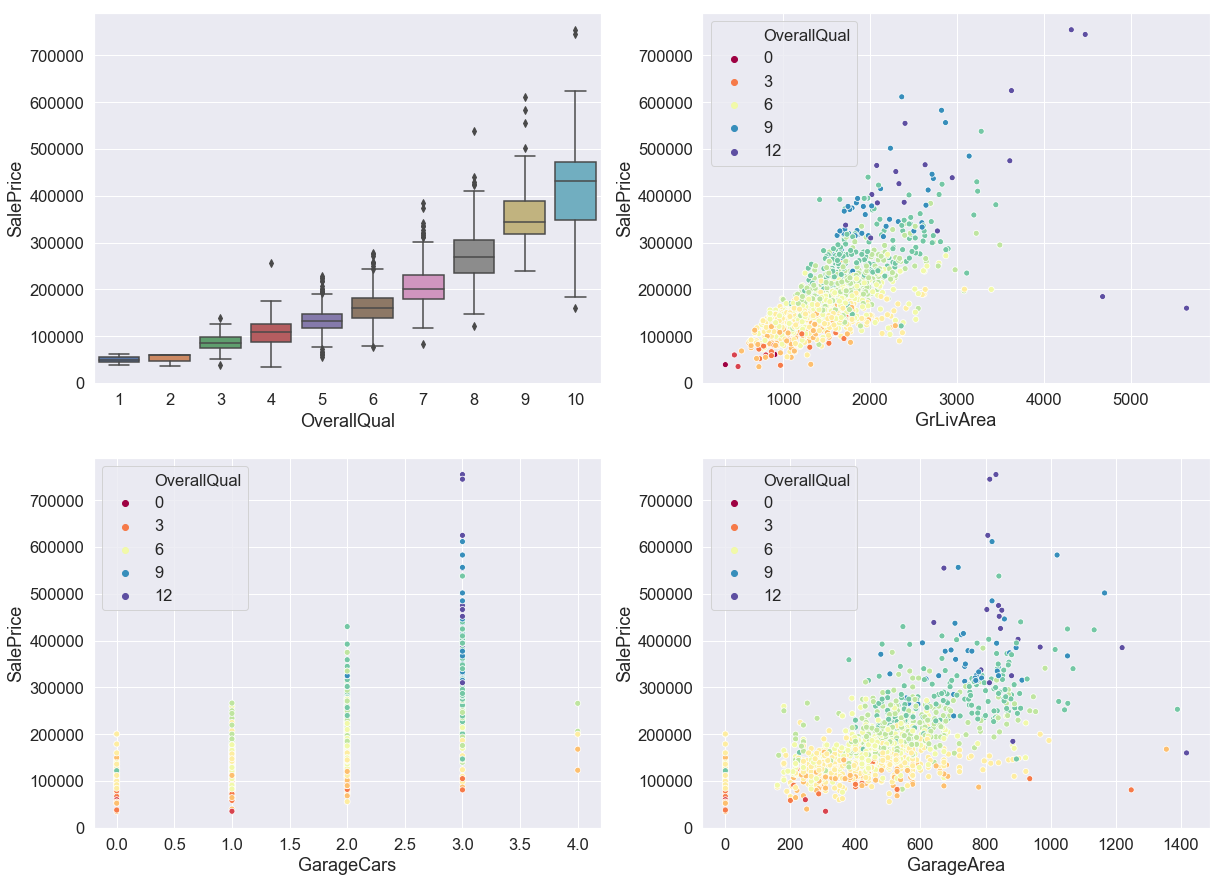

In [10]:
#visualizing features with high correlation

fig = plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)

#box plot overallqual 
fig1 = plt.subplot(221);
sns.boxplot(x='OverallQual', y='SalePrice', data=train[['SalePrice', 'OverallQual']])

#scatter plot GrLivarea
fig2 = plt.subplot(222);
sns.scatterplot(x=train.GrLivArea,y=train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

#scatter plot GarageCars
fig3 = plt.subplot(223);
sns.scatterplot(x=train.GarageCars,y=train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

#scatter plot GarageArea
fig4 = plt.subplot(224);
sns.scatterplot(x=train.GarageArea,y=train.SalePrice, hue=train.OverallQual, palette= 'Spectral')



Clearly, OverallQual has a logarithmic relationship with Saleprice, Hence we try to visualize our features with SalePrice by emphasizing much on Overallqual

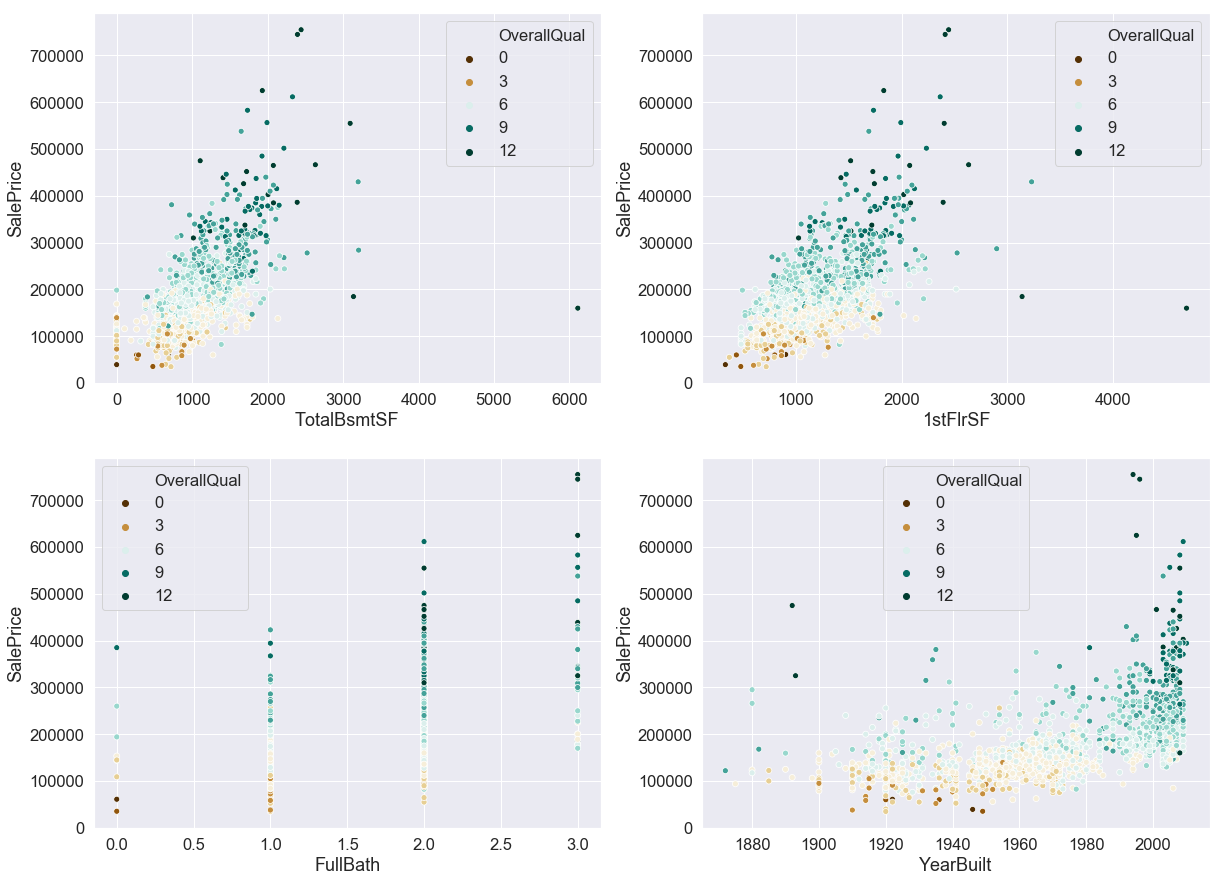

In [11]:
fig = plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)

fig6 = plt.subplot(221); 
sns.scatterplot(y = train.SalePrice , x = train.TotalBsmtSF, hue=train.OverallQual, palette= 'BrBG')

fig7 = plt.subplot(222); 
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF'], hue=train.OverallQual, palette= 'BrBG')

fig8= plt.subplot(223);
sns.scatterplot(y = train.SalePrice, x = train.FullBath, hue=train.OverallQual, palette= 'BrBG')

fig9 =plt.subplot(224);
sns.scatterplot(y = train.SalePrice, x = train.YearBuilt, hue=train.OverallQual, palette= 'BrBG')

Posssible Outliers:

1 Expensive house at overallqual grade 4 and few with higher grades#
2 Two entries with GrLivArea>4500 and overallqual>9 but very low price
3 House with TotalBsmtSF>6000 and high overallqual but low price
4 House with 1stFlrSF>4500 and high overallqual but low price
5 House with GarageArea>4500 and high overallqual but low price
6 House Built before 1875 and overallqual high but low price#

In [12]:
# removing outlier 2 from above list
train = train[train['GrLivArea']<4500]


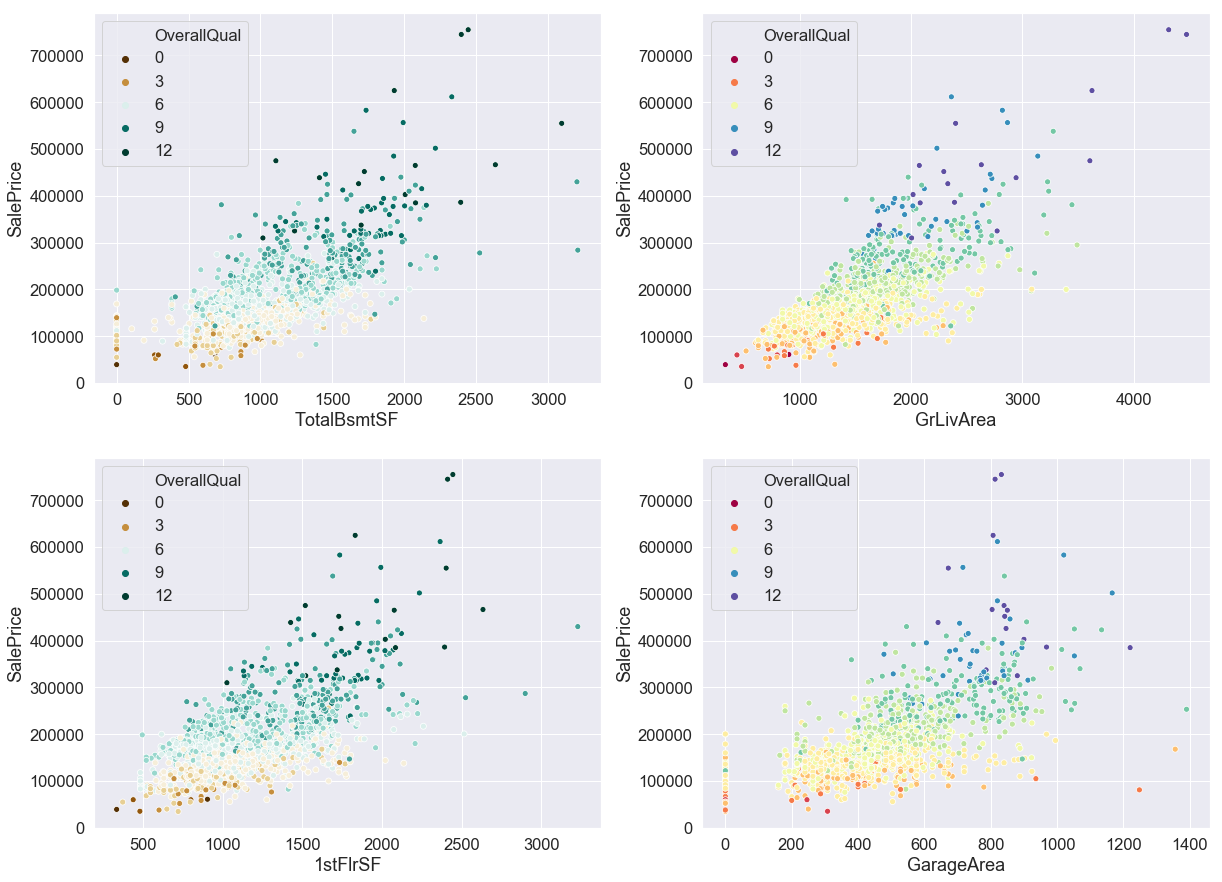

In [13]:
#plotting again to find the difference

fig = plt.figure(figsize=(20,15))
sns.set(font_scale=1.5)

#scatter plot TotalBsmtSF
fig1 = plt.subplot(221); 
sns.scatterplot(y = train.SalePrice , x = train.TotalBsmtSF, hue=train.OverallQual, palette= 'BrBG')

#scatter plot GrLivarea
fig2 = plt.subplot(222);
sns.scatterplot(x=train.GrLivArea,y=train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

#scatter plot 1stFlrSF
fig3 = plt.subplot(223); 
sns.scatterplot(y = train.SalePrice, x = train['1stFlrSF'], hue=train.OverallQual, palette= 'BrBG')

#scatter plot GarageArea
fig4 = plt.subplot(224);
sns.scatterplot(x=train.GarageArea,y=train.SalePrice, hue=train.OverallQual, palette= 'Spectral')



Year FeaturesJust removing the outlier from GrLivArea removes other possible outliers 2,3,4,5

### Year Features

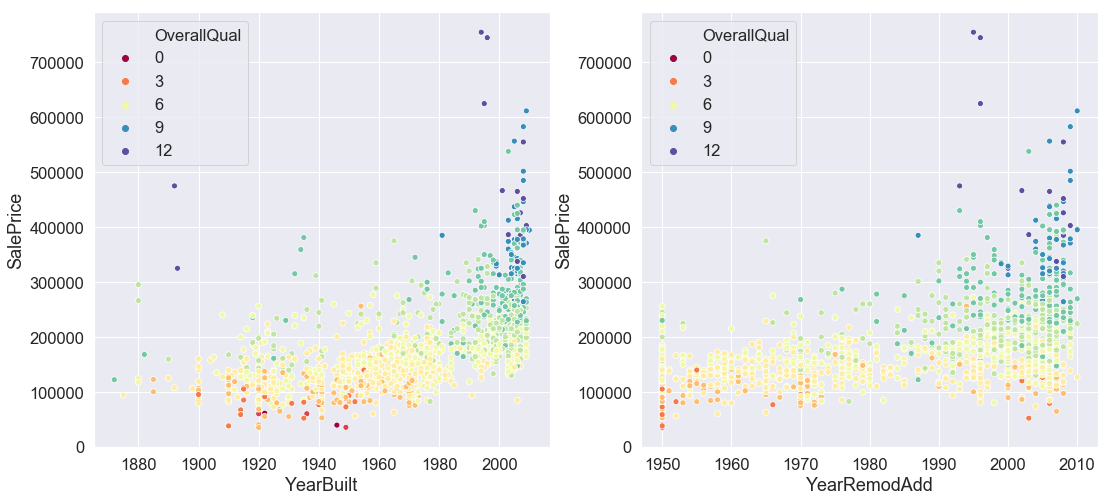

In [14]:
fig = plt.figure(figsize=(18,8))
sns.set(font_scale=1.5)

fig1 =plt.subplot(121);
sns.scatterplot(y = train.SalePrice, x = train.YearBuilt, hue=train.OverallQual, palette= 'Spectral')

fig2 =plt.subplot(122);
sns.scatterplot(y = train.SalePrice, x = train.YearRemodAdd, hue=train.OverallQual, palette= 'Spectral')

#scatter plot GarageCars
#fig3 = plt.subplot(223);
#sns.scatterplot(x=train.GarageCars,y=train.SalePrice, hue=train.OverallQual, palette= 'Spectral')

#scatter plot GarageArea
#fig4 = plt.subplot(224);
#sns.scatterplot(x=train.GarageArea,y=train.SalePrice, hue=train.OverallQual, palette= 'Spectral')



clearly, the houses that were built earlier and have good OverallQual may have went through further renovation.\
#still think

In [15]:
# let us findout all the features with year values
yr  = [x for x in train.columns if 'Year' in x or 'Yr' in x]
yr

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [16]:
data = train.copy()

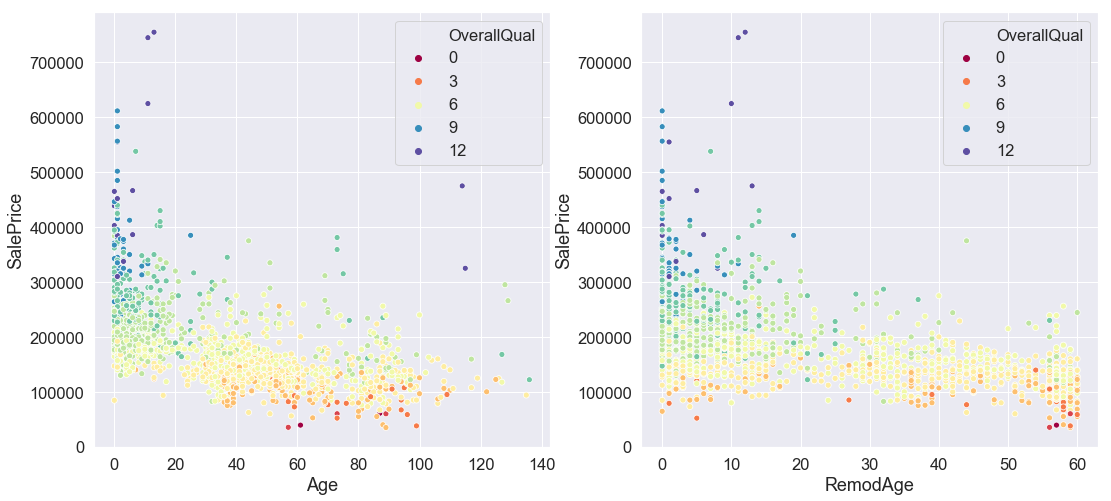

In [17]:
data['Age'] = data['YrSold']-data['YearBuilt']
data['RemodAge']= data['YrSold']-data['YearRemodAdd']

plt.figure(figsize=(18,8))
sns.set(font_scale=1.5)
fig1=plt.subplot(121);
sns.scatterplot(y = data.SalePrice, x = data.Age, hue=data.OverallQual, palette= 'Spectral')

fig2 =plt.subplot(122);
sns.scatterplot(y = data.SalePrice, x = data.RemodAge, hue=data.OverallQual, palette= 'Spectral')

In [18]:
Corr_year = data[['RemodAge','Age','YrSold','SalePrice']]
co = Corr_year.corr()['SalePrice']
print(co)

RemodAge    -0.510
Age         -0.524
YrSold      -0.029
SalePrice    1.000
Name: SalePrice, dtype: float64


In [19]:
#train['Age']=data['Age']
#train['RemodAge']=data['Age']
#train.head()

In [20]:
#Corr_year
# we find that RemodAge and Age are slightly better correlated to Saleprice then YrRemodAdd and YrBuilt==

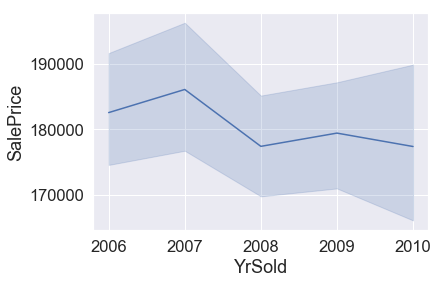

In [21]:
sns.lineplot(x='YrSold',y='SalePrice',data=train)
# it is evident that with more age price is decreasing

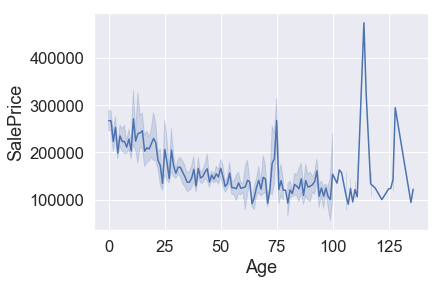

In [22]:
#sns.scatterplot(x='Age',y='SalePrice',data=data) #probable outliers
sns.lineplot(x='Age',y='SalePrice',data=data)  

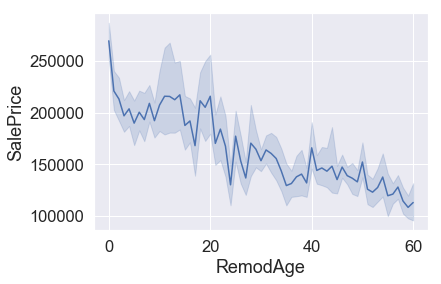

In [23]:
sns.lineplot(x='RemodAge',y='SalePrice',data=data) 

In [24]:
data=data[data['Age']>100]
data=data[data['SalePrice']>285000]
data
# remod age is very less and hence these are not considered as outliers

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
185          75       RM       90.000    22950   Pave   NaN      IR2   
304          75       RM       87.000    18386   Pave   NaN      Reg   
583          75       RM       75.000    13500   Pave   NaN      Reg   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
185         Lvl    AllPub    Inside       Gtl      OldTown     Artery   
304         Lvl    AllPub    Inside       Gtl      OldTown       Norm   
583         Lvl    AllPub    Inside       Gtl      OldTown     Artery   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
185       Norm     1Fam     2.5Fin           10            9       1892   
304       Norm     1Fam     2.5Fin            7            9       1880   
583       PosA     1Fam     2.5Unf           10            9       1893   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
185          1993     Gable  WdShngl     Wd Sdng     Wd Sdng       None   
304          2002     Gable  CompShg     CemntBd     CmentBd       None   
583          2000     Gable  CompShg     Wd Sdng     Wd Sdng       None   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
185       0.000        Gd        Gd     BrkTil       TA       TA           Mn   
304       0.000        TA        TA     BrkTil       TA       TA           No   
583       0.000        Ex        Ex     BrkTil       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
185          Unf           0          Unf           0       1107         1107   
304          Unf           0          Unf           0       1470         1470   
583          Unf           0          Unf           0       1237         1237   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
185    GasA        Ex          Y      SBrkr      1518      1518           572   
304    GasA        Ex          Y      SBrkr      1675      1818             0   
583    GasA        Gd          Y      SBrkr      1521      1254             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
185       3608             0             0         2         1             4   
304       3493             0             0         3         0             3   
583       2775             0             0         3         1             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
185             1          Ex            12        Typ           2   
304             1          Gd            10        Typ           1   
583             1          Gd             9        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
185          TA     Detchd     1993.000          Unf           3         840   
304          Ex     Attchd     2003.000          Unf           3         870   
583          Gd     Detchd     1988.000          Unf           2         880   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
185         Ex         TA          Y           0          260              0   
304         TA         TA          Y         302            0              0   
583         Gd         TA          Y         105          502              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC  Fence MiscFeature  MiscVal  \
185          0          410         0    NaN  GdPrv         NaN        0   
304          0            0         0    NaN    NaN         NaN        0   
583          0            0         0    NaN    NaN         NaN        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  Age  RemodAge  
185       6    2006       WD        Normal     475000  114        13  
304       5    2008       WD        Normal     295000  128         6  
583       7    2008       WD        Normal     325000  115         8

### Garage area and garage cars

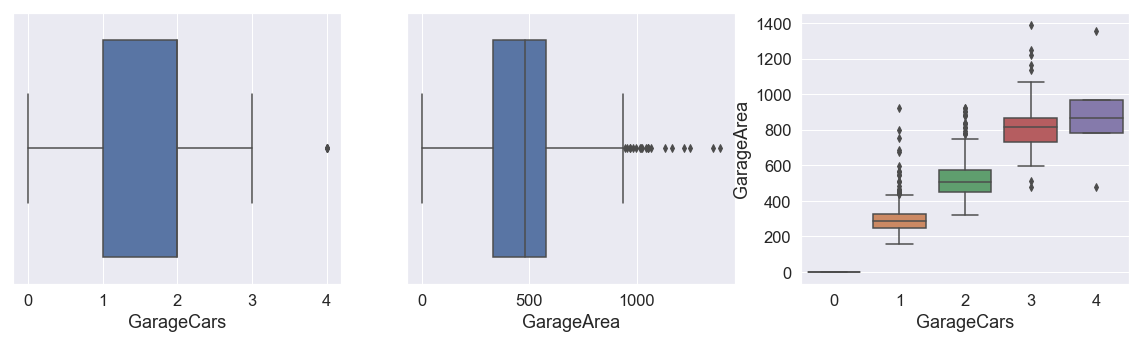

In [25]:
fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(131); sns.boxplot(train.GarageCars)
fig2 = fig.add_subplot(132); sns.boxplot(train.GarageArea)
fig3 = fig.add_subplot(133); sns.boxplot(train.GarageCars, train.GarageArea)
plt.show()

                                                                 Outliers: 4


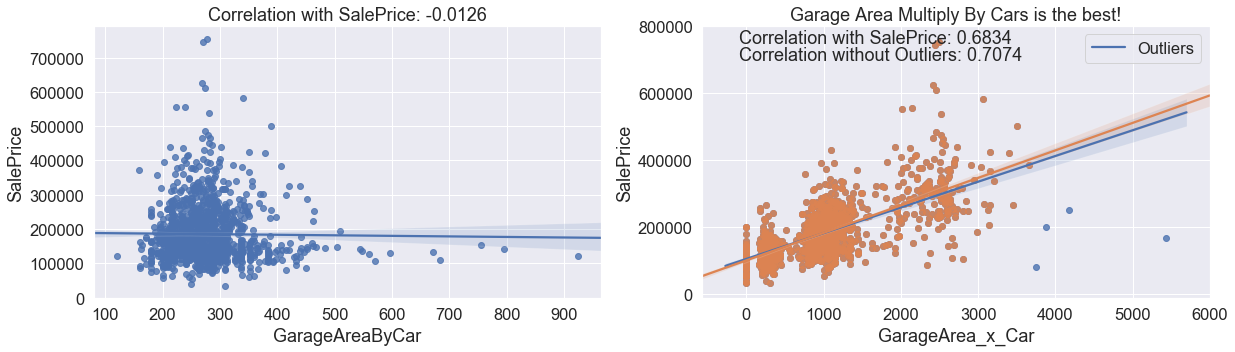

In [26]:
df = train[['SalePrice', 'GarageArea', 'GarageCars']]
df['GarageAreaByCar'] = train.GarageArea/train.GarageCars
df['GarageArea_x_Car'] = train.GarageArea*train.GarageCars

fig = plt.figure(figsize=(20,5))
fig1 = fig.add_subplot(121); sns.regplot(x='GarageAreaByCar', y='SalePrice', data=df)
plt.title('Correlation with SalePrice: {:6.4f}'.format(df.GarageAreaByCar.corr(df['SalePrice'])))

fig2 = fig.add_subplot(122); sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.legend(['Outliers'])
plt.text(x=-100, y=750000, s='Correlation with SalePrice: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
print('                                                                 Outliers:',(df.GarageArea_x_Car>=3700).sum())
df = df.loc[df.GarageArea_x_Car<3700]
sns.regplot(x='GarageArea_x_Car', y='SalePrice', data=df); plt.title('Garage Area Multiply By Cars is the best!')
plt.text(x=-100, y=700000, s='Correlation without Outliers: {:6.4f}'.format(df.GarageArea_x_Car.corr(df['SalePrice'])))
plt.show()
del df
             

clearly, removal of outliers increases the correlation 

In [27]:
train = train[train.GarageArea * train.GarageCars < 3700]


### Bathroom features

In [28]:
bath_feature= [x for x in train.columns if 'Bath' in x]
bath_feature

['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

[1 0 2 3]
[0 1 2]
[2 1 3 0]
[1 0 2]


Text(0.5, 1.0, 'Correlation:-0.0177 ')

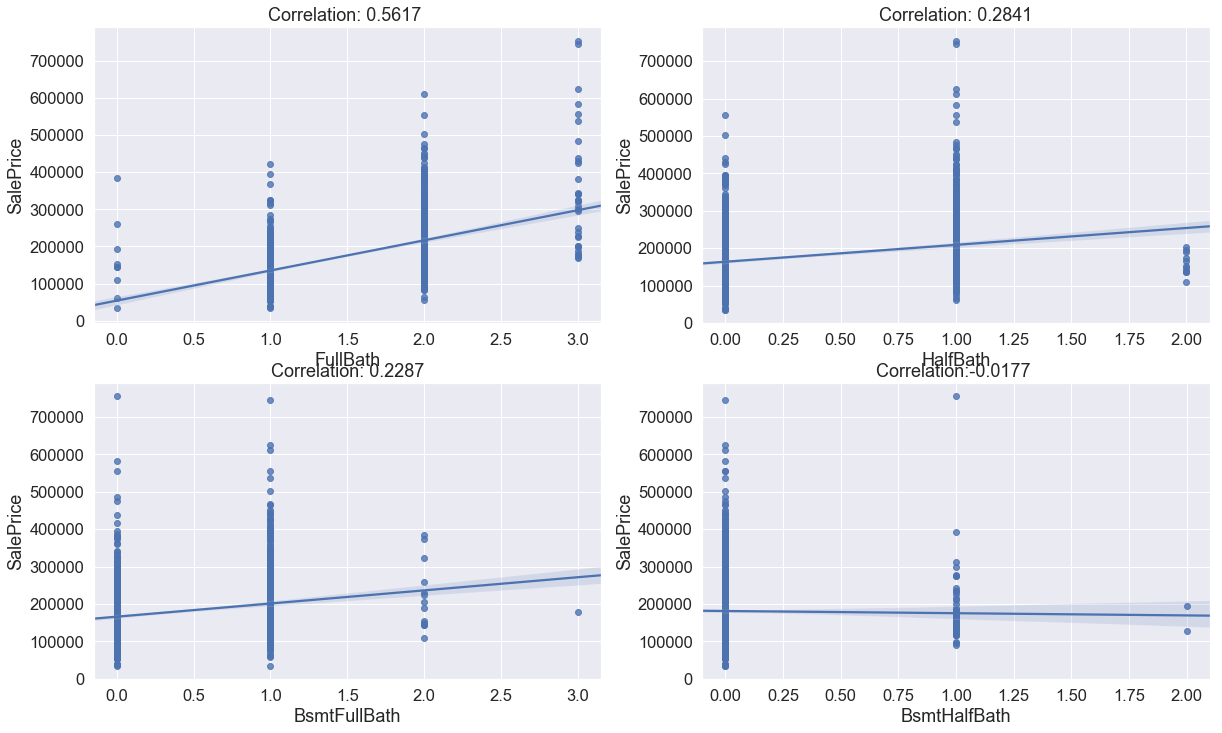

In [29]:
for feature in bath_feature:
    print(train[feature].unique())

fig = plt.figure(figsize=(20,12))
fig1= plt.subplot(2,2,1);
sns.regplot(x='FullBath',y='SalePrice',data=train)
plt.title('Correlation: {:6.4f} '.format(train.FullBath.corr(train['SalePrice'])))

fig2= plt.subplot(2,2,2);
sns.regplot(x='HalfBath',y='SalePrice',data=train)
plt.title('Correlation: {:6.4f}'.format(train.HalfBath.corr(train['SalePrice'])))


fig3= plt.subplot(2,2,3);
sns.regplot(x='BsmtFullBath',y='SalePrice',data=train)
plt.title('Correlation: {:6.4f}'.format(train.BsmtFullBath.corr(train['SalePrice'])))

fig4= plt.subplot(2,2,4);
sns.regplot(x='BsmtHalfBath',y='SalePrice',data=train)
plt.title('Correlation:{:6.4f} '.format(train.BsmtHalfBath.corr(train['SalePrice'])))


In [30]:
df = train[bath_feature]
df['SalePrice'] = train['SalePrice']

df['TotBath']= df.FullBath + df.BsmtFullBath + (df.HalfBath*0.5)+ (df.BsmtHalfBath*0.5)


Text(1, 700000, 'Correlation without outliers: 0.6462 ')

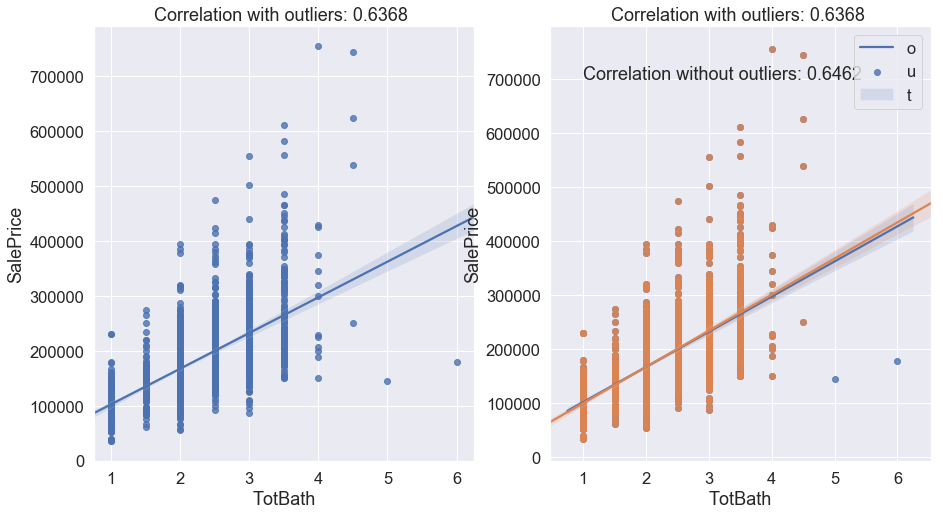

In [31]:
fig = plt.figure(figsize=(15,8))
fig1= plt.subplot(121);
sns.regplot(x='TotBath',y='SalePrice',data=df)
plt.title('Correlation with outliers: {:6.4f} '.format(df.TotBath.corr(df['SalePrice'])))

fig2=plt.subplot(122)
sns.regplot(x='TotBath', y='SalePrice', data=df);
plt.title('Correlation with outliers: {:6.4f} '.format(df.TotBath.corr(df['SalePrice'])))
plt.legend('outliers')

df=df.loc[df['TotBath']<5]
sns.regplot(x='TotBath', y='SalePrice', data=df);
plt.text(x=1,y=700000,s='Correlation without outliers: {:6.4f} '.format(df.TotBath.corr(df['SalePrice'])))

#fig2= plt.subplot(1,2,2);
#sns.regplot(x='HalfBath',y='SalePrice',data=train)
#plt.title('Correlation: {:6.4f}'.format(train.HalfBath.corr(train['SalePrice'])))


we find that there are outliers 2, we vcan remove them and also it increases correlation

In [32]:
train = train[(train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5))<5]

## SquareFootage features

In [33]:
SF_feature= [x for x in train.columns if 'SF' in x]
SF_feature=SF_feature[3:6]
SF_feature

['TotalBsmtSF', '1stFlrSF', '2ndFlrSF']

In [34]:
df=train[SF_feature]
df['SalePrice']=train['SalePrice']
df['TotalSF']=train['1stFlrSF']+train['2ndFlrSF']
for i in df.columns:
    print(i,df[i].corr(df['SalePrice']))

TotalBsmtSF 0.6515744889627348
1stFlrSF 0.6319151091489047
2ndFlrSF 0.3215845589191098
SalePrice 0.9999999999999998
TotalSF 0.7456591047560611


Text(0.5, 1.0, 'Correlation: 0.6516')

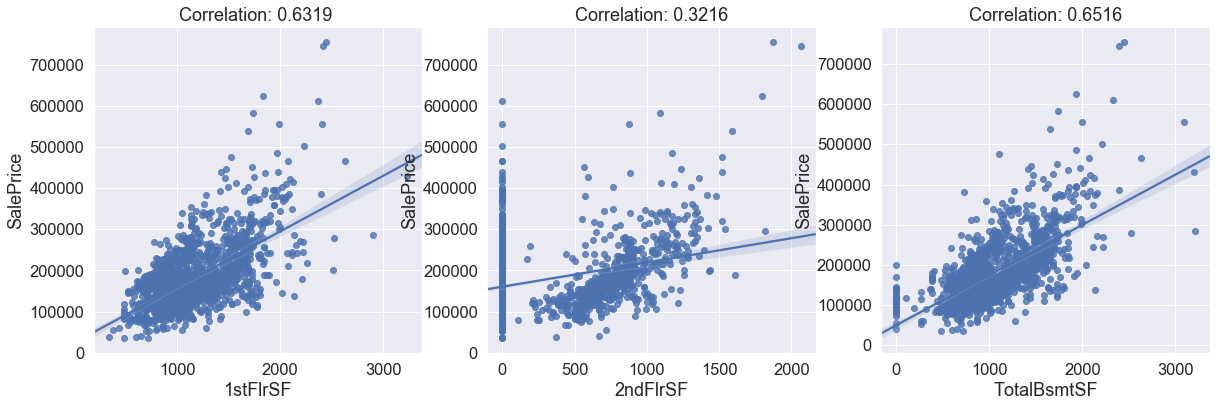

In [35]:
fig = plt.figure(figsize=(20,6))
fig1= plt.subplot(1,3,1);
sns.regplot(x='1stFlrSF',y='SalePrice',data=train)
plt.title('Correlation: {:6.4f} '.format(train['1stFlrSF'].corr(train['SalePrice'])))

fig2= plt.subplot(1,3,2);
sns.regplot(x='2ndFlrSF',y='SalePrice',data=train)
plt.title('Correlation: {:6.4f}'.format(train['2ndFlrSF'].corr(train['SalePrice'])))


fig3= plt.subplot(1,3,3);
sns.regplot(x='TotalBsmtSF',y='SalePrice',data=train)
plt.title('Correlation: {:6.4f}'.format(train.TotalBsmtSF.corr(train['SalePrice'])))

## Numerical Data Analysis

In [36]:
num_feature= [x for x in train.columns if train[x].dtypes != 'O' ]
num_feature

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [37]:
lessunique = [x for x in num_feature if train[x].nunique() < 25]
lessunique

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

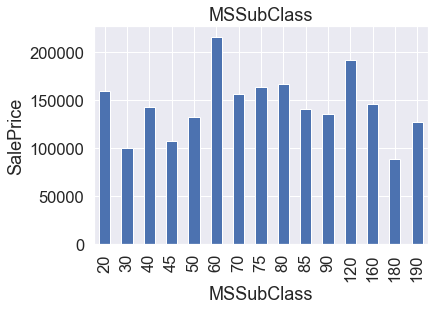

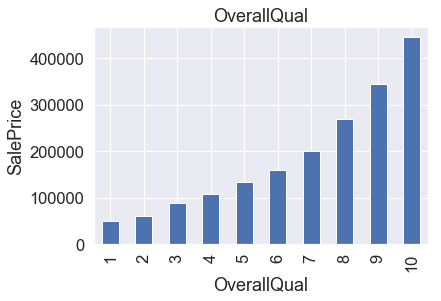

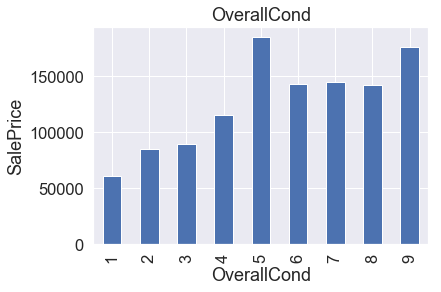

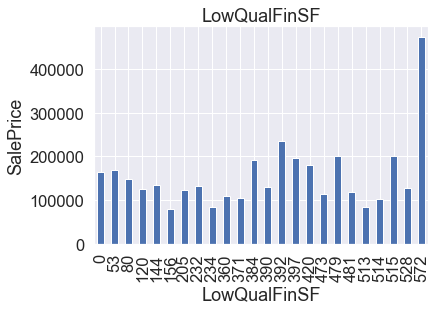

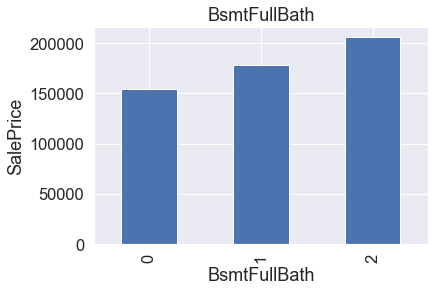

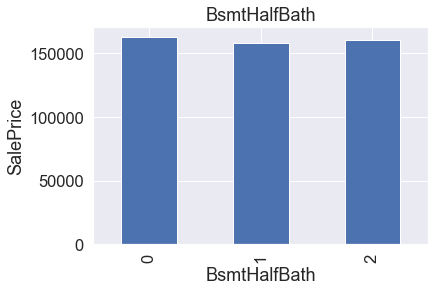

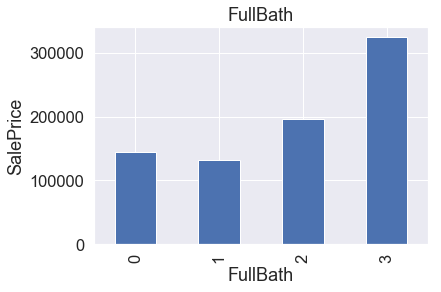

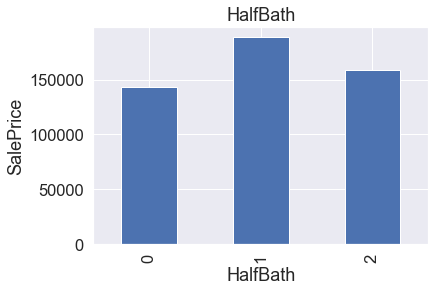

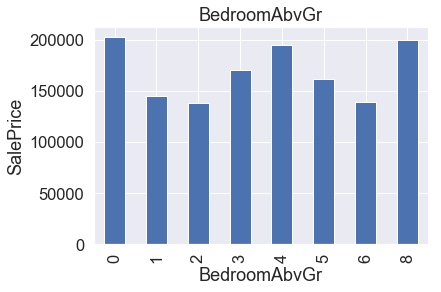

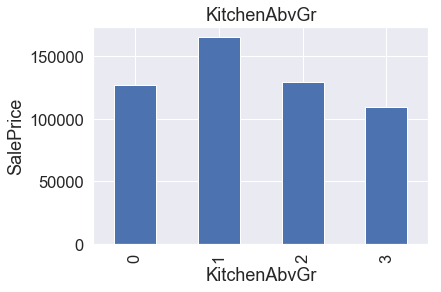

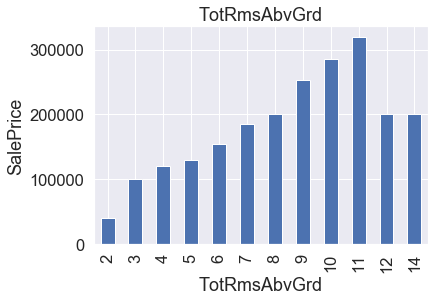

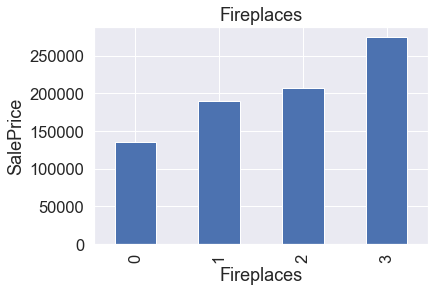

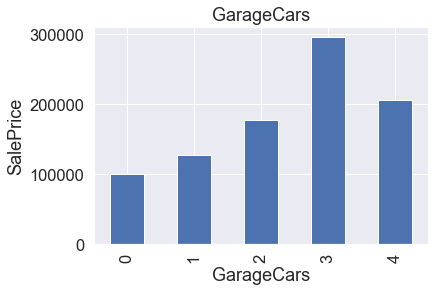

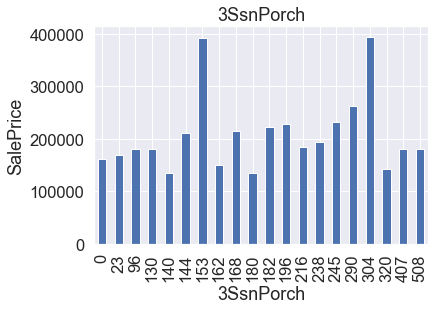

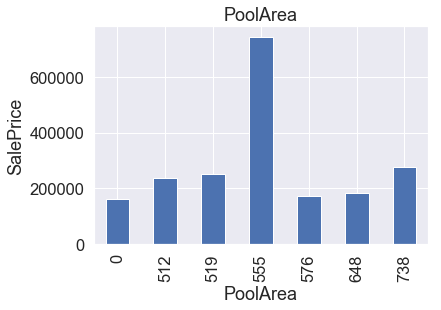

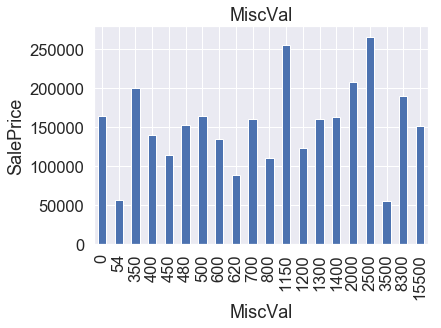

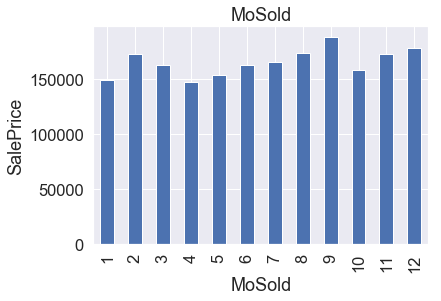

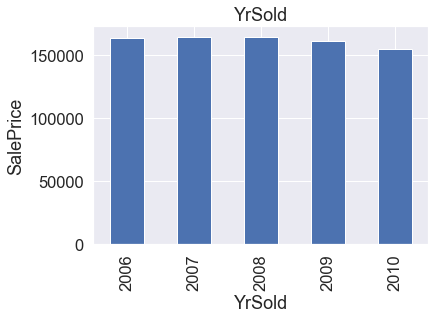

In [38]:


for feature in lessunique:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.title(feature)
    plt.ylabel('SalePrice')
    plt.show()


In [39]:
moreunique = [x for x in num_feature if x not in lessunique]
moreunique

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

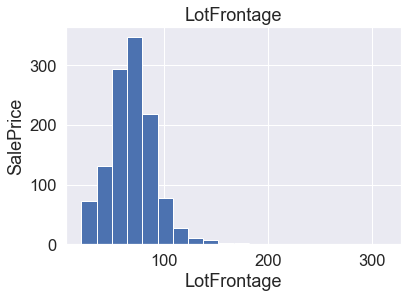

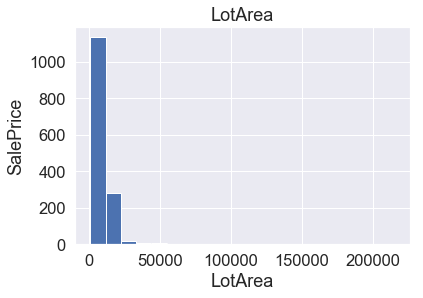

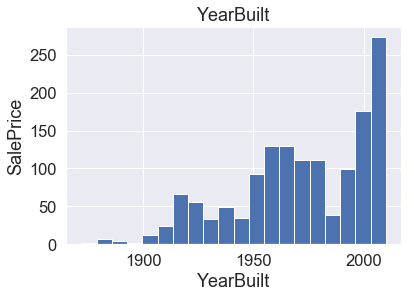

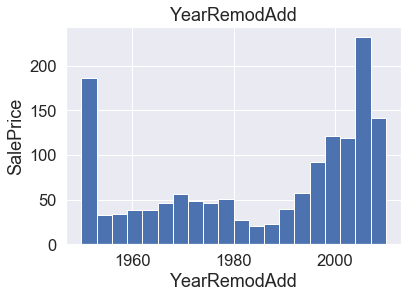

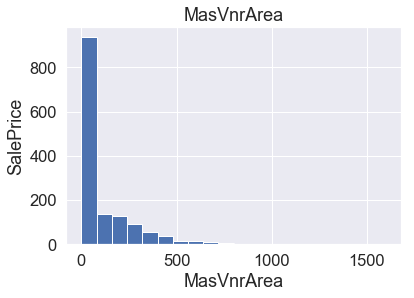

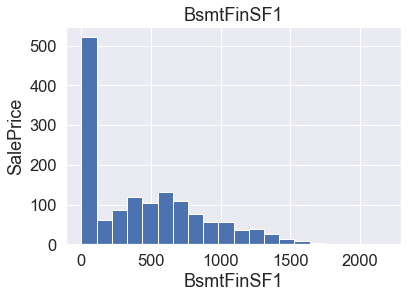

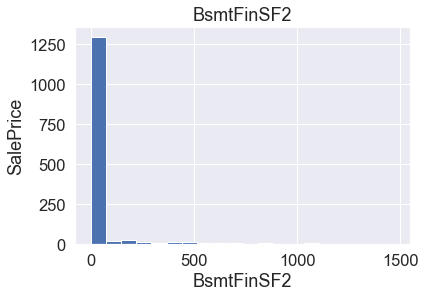

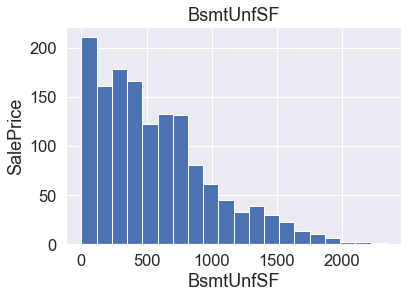

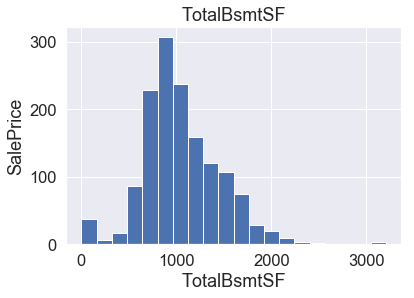

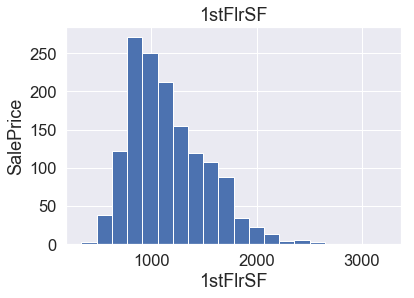

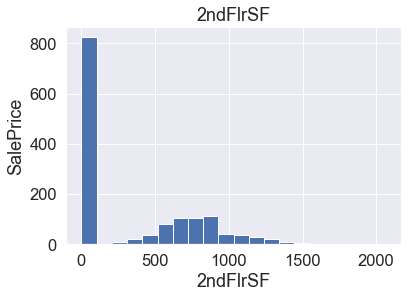

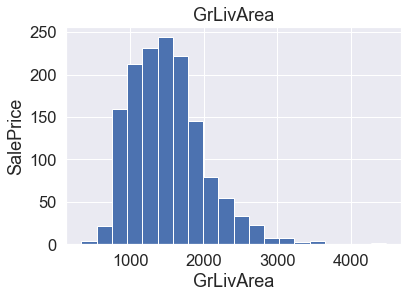

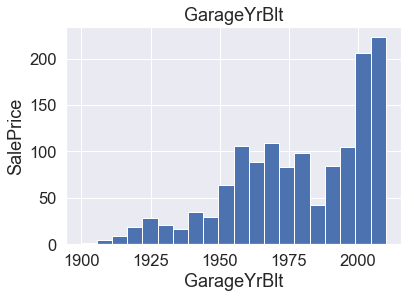

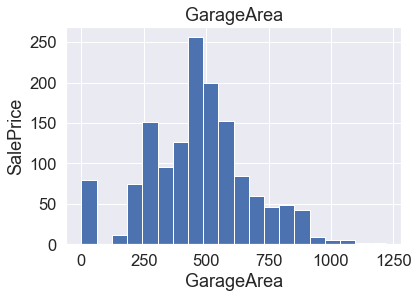

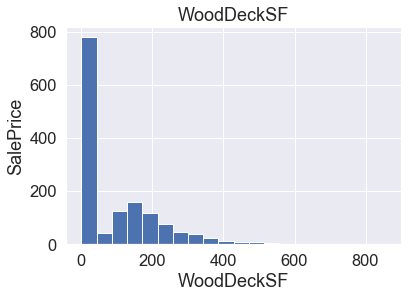

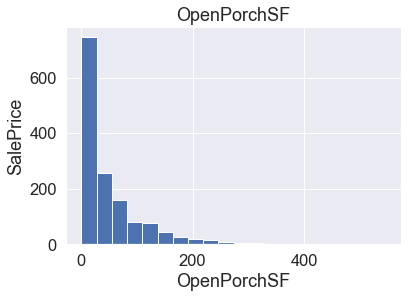

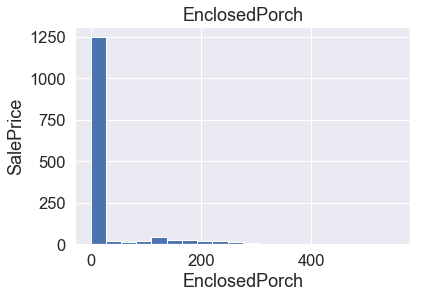

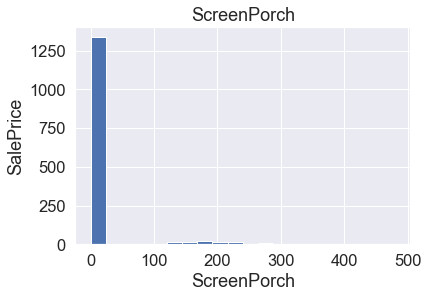

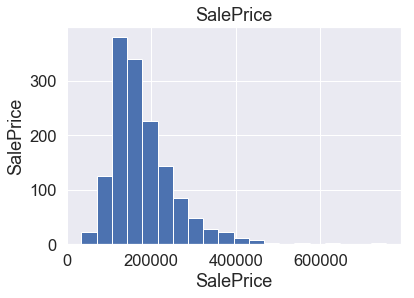

In [40]:
for feature in moreunique:
    data=train.copy()
    data[feature].hist(bins=20)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [41]:
deatils = analysis(train,'SalePrice')
details.sort_values(by='corr SalePrice', ascending=False)

types  counts  \
SalePrice        int64    1460   
OverallQual      int64    1460   
GrLivArea        int64    1460   
GarageCars       int64    1460   
GarageArea       int64    1460   
TotalBsmtSF      int64    1460   
1stFlrSF         int64    1460   
FullBath         int64    1460   
TotRmsAbvGrd     int64    1460   
YearBuilt        int64    1460   
YearRemodAdd     int64    1460   
GarageYrBlt    float64    1379   
MasVnrArea     float64    1452   
Fireplaces       int64    1460   
BsmtFinSF1       int64    1460   
LotFrontage    float64    1201   
WoodDeckSF       int64    1460   
2ndFlrSF         int64    1460   
OpenPorchSF      int64    1460   
HalfBath         int64    1460   
LotArea          int64    1460   
BsmtFullBath     int64    1460   
BsmtUnfSF        int64    1460   
BedroomAbvGr     int64    1460   
ScreenPorch      int64    1460   
PoolArea         int64    1460   
MoSold           int64    1460   
3SsnPorch        int64    1460   
BsmtFinSF2       int64    1460   
BsmtHalfBath     int64    1460   
...                ...     ...   
RoofStyle       object    1460   
RoofMatl        object    1460   
Exterior1st     object    1460   
Exterior2nd     object    1460   
MasVnrType      object    1452   
ExterQual       object    1460   
ExterCond       object    1460   
Foundation      object    1460   
BsmtQual        object    1423   
BsmtCond        object    1423   
BsmtExposure    object    1422   
BsmtFinType1    object    1423   
BsmtFinType2    object    1422   
Heating         object    1460   
HeatingQC       object    1460   
CentralAir      object    1460   
Electrical      object    1459   
KitchenQual     object    1460   
Functional      object    1460   
FireplaceQu     object     770   
GarageType      object    1379   
GarageFinish    object    1379   
GarageQual      object    1379   
GarageCond      object    1379   
PavedDrive      object    1460   
PoolQC          object       7   
Fence           object     281   
MiscFeature     object      54   
SaleType        object    1460   
SaleCondition   object    1460   

                                                         uniques  nulls  \
SalePrice      [208500, 181500, 223500, 140000, 250000, 14300...      0   
OverallQual                      [7, 6, 8, 5, 9, 4, 10, 3, 1, 2]      0   
GrLivArea      [1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...      0   
GarageCars                                       [2, 3, 1, 0, 4]      0   
GarageArea     [548, 460, 608, 642, 836, 480, 636, 484, 468, ...      0   
TotalBsmtSF    [856, 1262, 920, 756, 1145, 796, 1686, 1107, 9...      0   
1stFlrSF       [856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...      0   
FullBath                                            [2, 1, 3, 0]      0   
TotRmsAbvGrd            [8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14]      0   
YearBuilt      [2003, 1976, 2001, 1915, 2000, 1993, 2004, 197...      0   
YearRemodAdd   [2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...      0   
GarageYrBlt    [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....     81   
MasVnrArea     [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...      8   
Fireplaces                                          [0, 1, 2, 3]      0   
BsmtFinSF1     [706, 978, 486, 216, 655, 732, 1369, 859, 0, 8...      0   
LotFrontage    [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...    259   
WoodDeckSF     [0, 298, 192, 40, 255, 235, 90, 147, 140, 160,...      0   
2ndFlrSF       [854, 0, 866, 756, 1053, 566, 983, 752, 1142, ...      0   
OpenPorchSF    [61, 0, 42, 35, 84, 30, 57, 204, 4, 21, 33, 21...      0   
HalfBath                                               [1, 0, 2]      0   
LotArea        [8450, 9600, 11250, 9550, 14260, 14115, 10084,...      0   
BsmtFullBath                                        [1, 0, 2, 3]      0   
BsmtUnfSF      [150, 284, 434, 540, 490, 64, 317, 216, 952, 1...      0   
BedroomAbvGr                            [3, 4, 1, 2, 0, 5, 6, 8]      0   
ScreenPorch    [0, 176, 198, 291,

## Categorical Data Analysis

In [42]:
cat_feature= [x for x in train.columns if train[x].dtype=='O']
cat_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

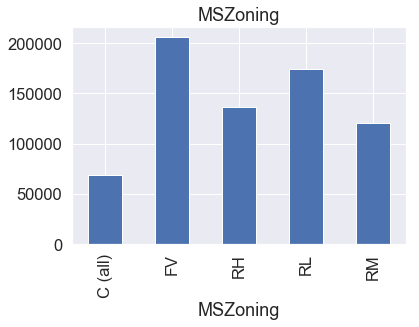

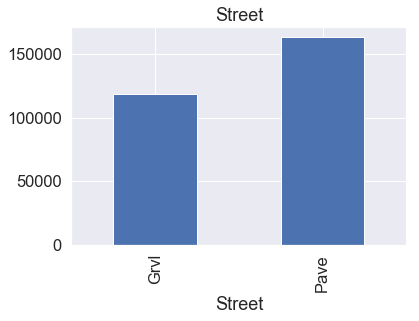

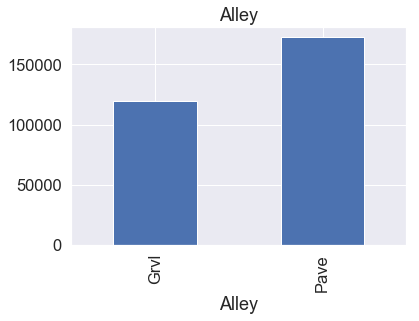

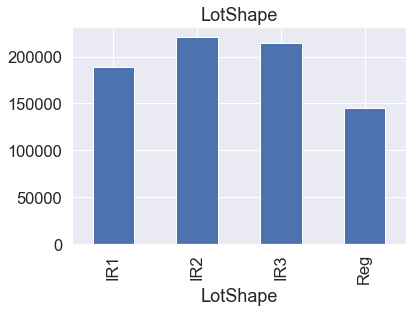

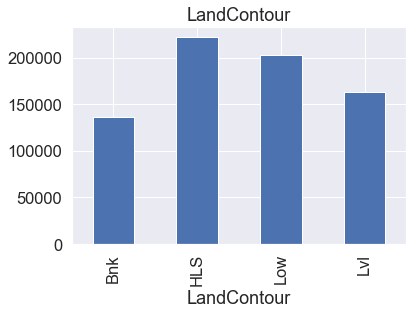

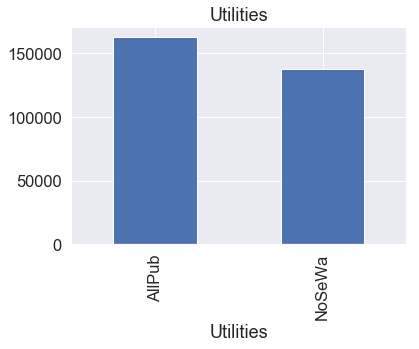

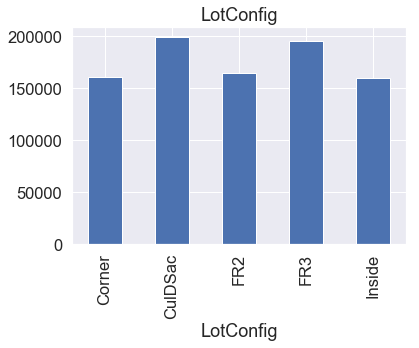

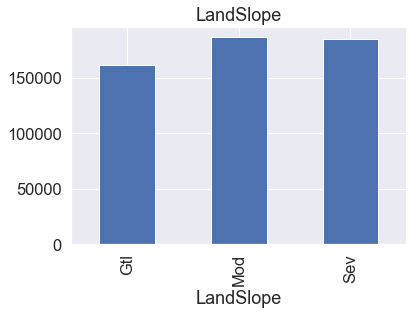

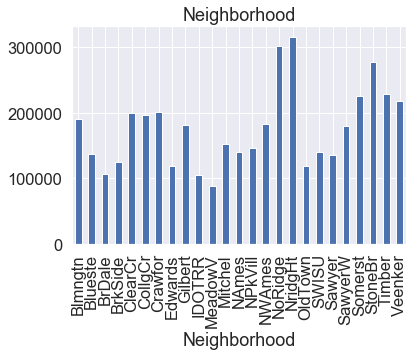

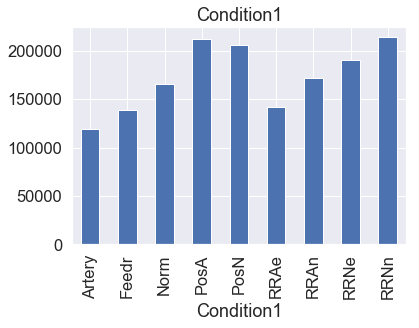

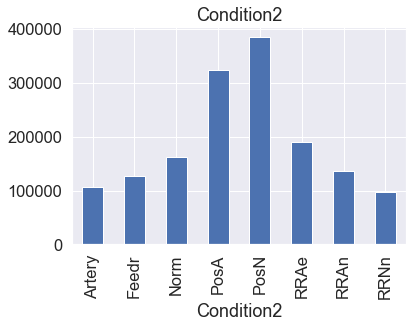

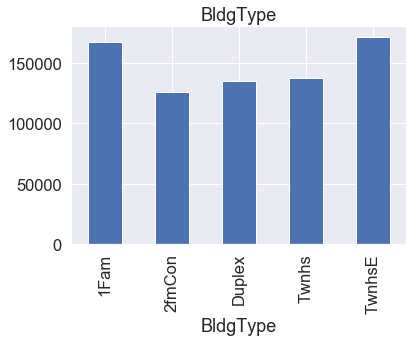

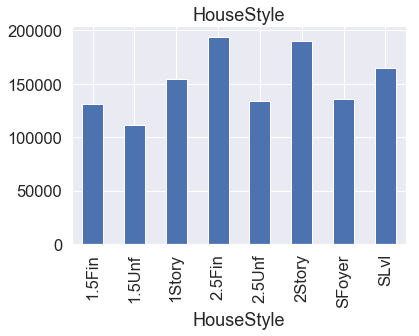

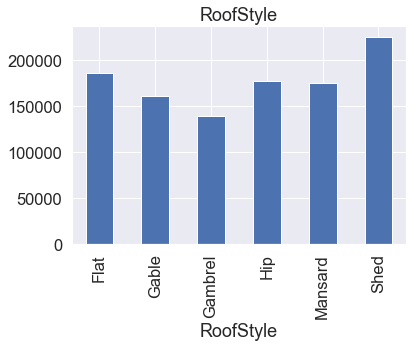

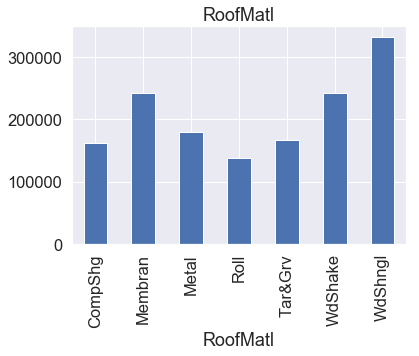

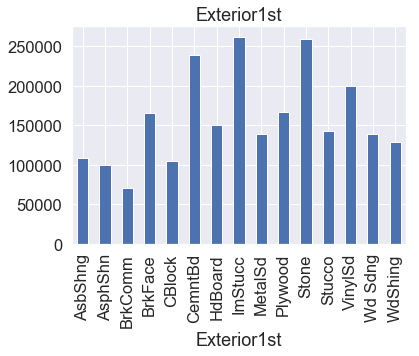

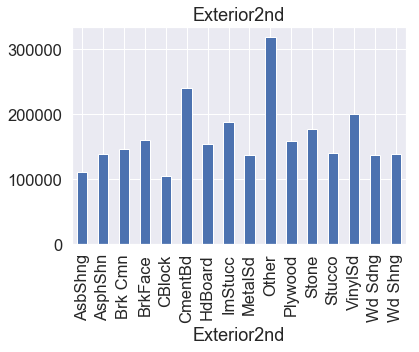

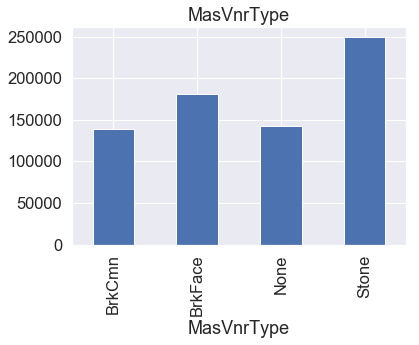

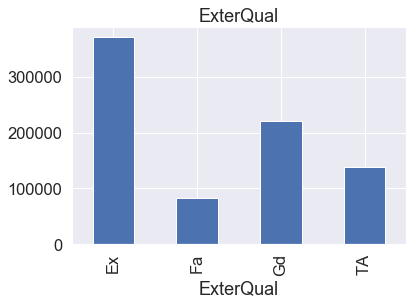

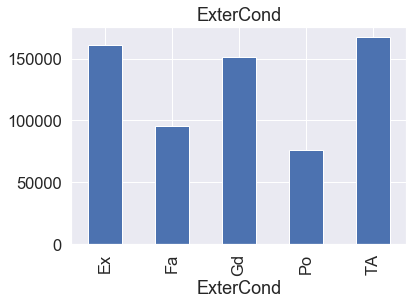

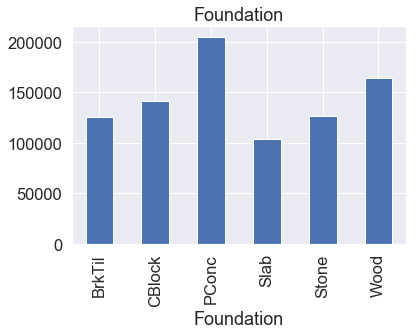

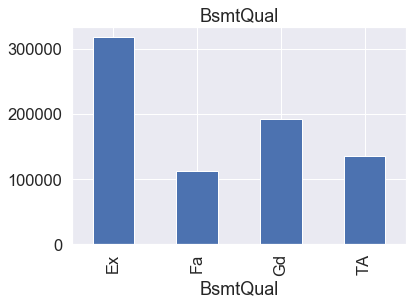

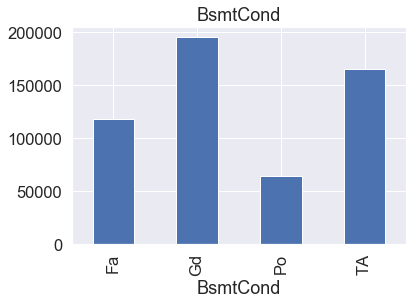

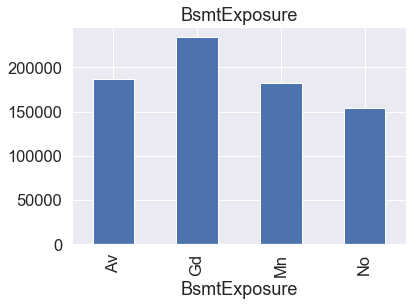

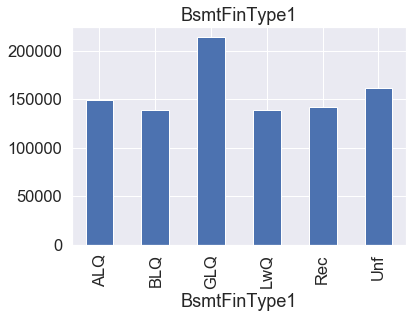

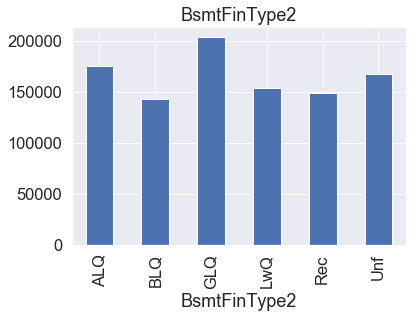

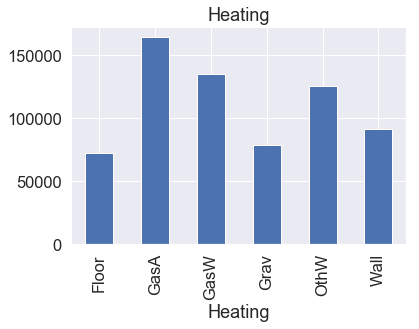

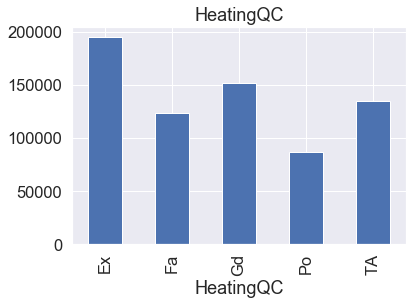

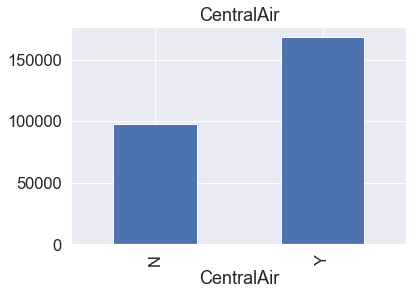

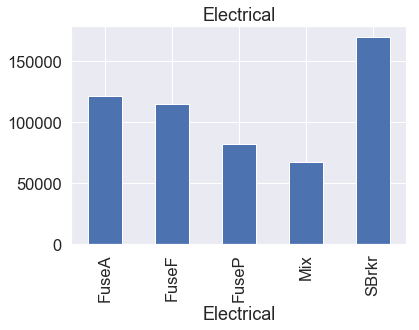

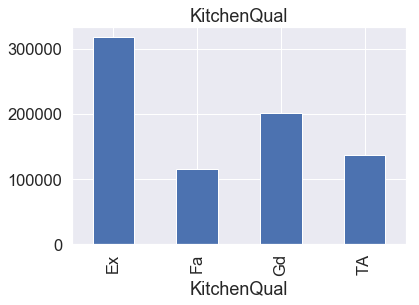

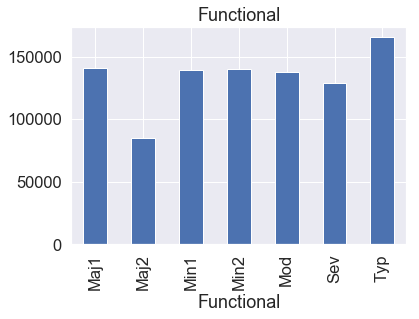

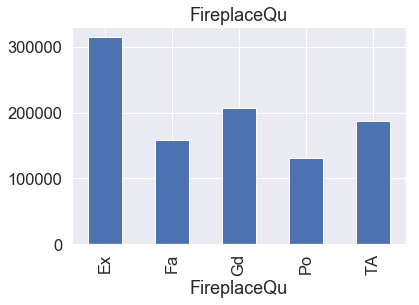

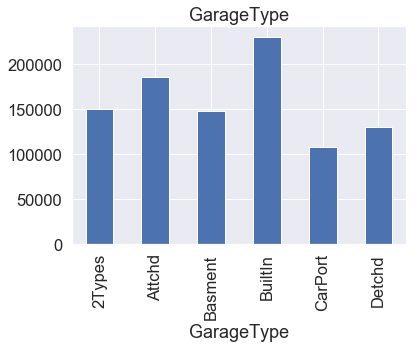

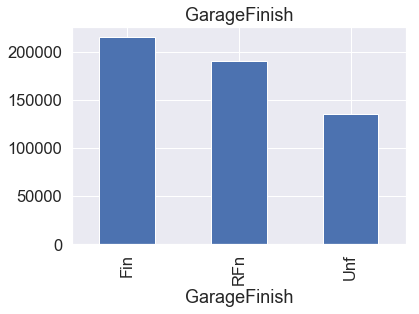

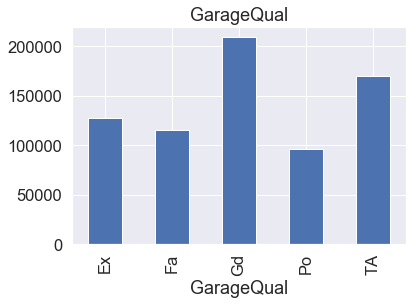

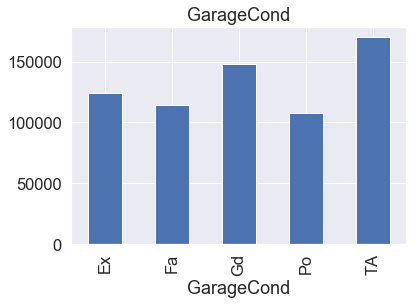

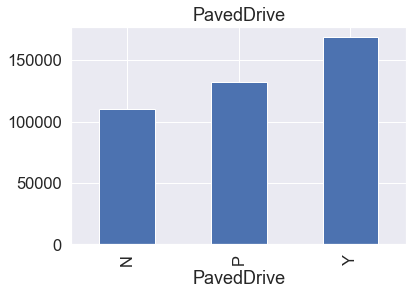

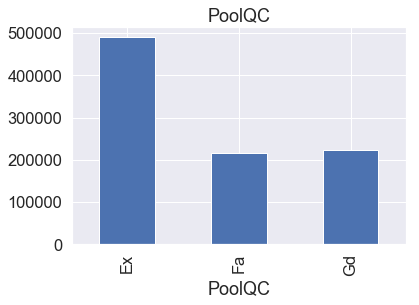

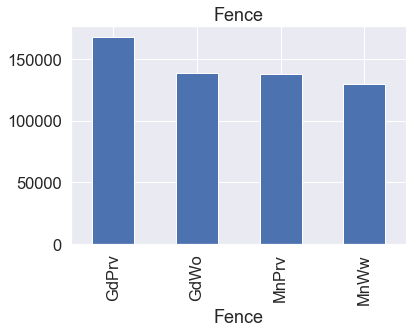

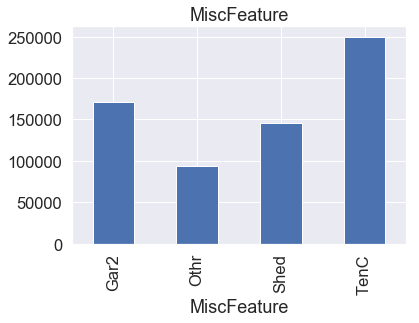

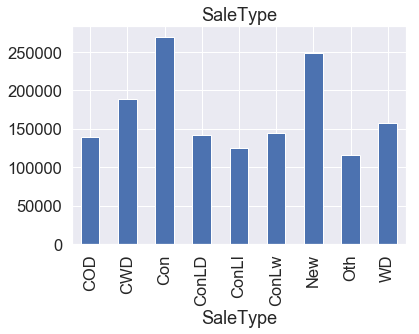

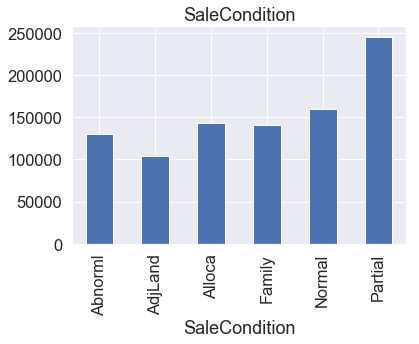

In [43]:
for feature in cat_feature:
    data=train.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

## Target Variable

In [44]:
y_train = train.SalePrice.values

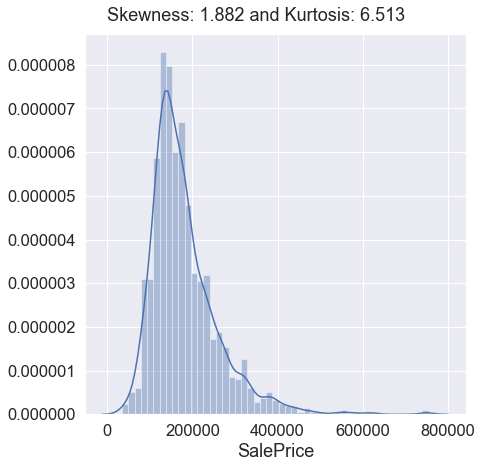

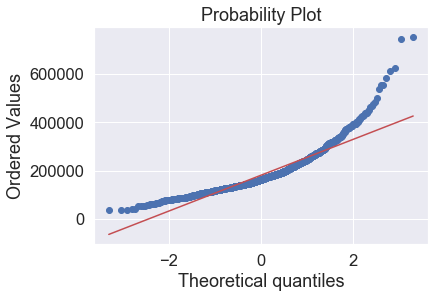

In [45]:
fig=plt.figure(figsize=(15,7))

fig1=plt.subplot(121);
sns.distplot(train['SalePrice'],norm_hist=True,kde=True)
plt.text(x=0,y=0.000009,s='Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['SalePrice'].skew(),train['SalePrice'].kurtosis()))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()



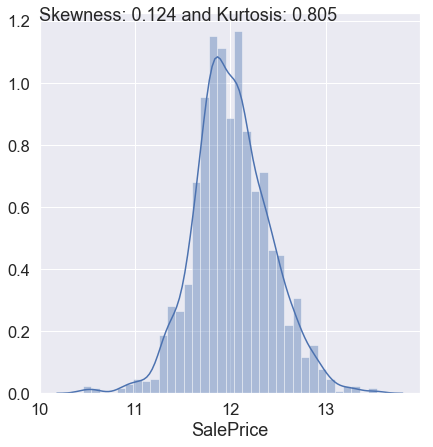

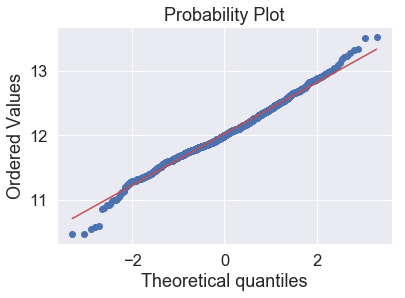

In [46]:
train.SalePrice = np.log1p(train.SalePrice)
fig=plt.figure(figsize=(15,7))
fig2= plt.subplot(121)
sns.distplot(train['SalePrice'],norm_hist=True,kde=True)
plt.text(x=10,y=1.2,s='Skewness: {:.3f} and Kurtosis: {:.3f}'.format(train['SalePrice'].skew(),train['SalePrice'].kurtosis()))

fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()


In [47]:
ntrain=train.shape[0]

# handle missing value

In [48]:
train.head()
train.shape


(1452, 80)

In [49]:
dataset = pd.concat((train,test)).reset_index(drop=True)
dataset.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL       65.000     8450   Pave   NaN      Reg   
1          20       RL       80.000     9600   Pave   NaN      Reg   
2          60       RL       68.000    11250   Pave   NaN      IR1   
3          70       RL       60.000     9550   Pave   NaN      IR1   
4          60       RL       84.000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0     196.000        Gd        TA      PConc       Gd       TA           No   
1       0.000        TA        TA     CBlock       Gd       TA           Gd   
2     162.000        Gd        TA      PConc       Gd       TA           Mn   
3       0.000        TA        TA     BrkTil       TA       Gd           No   
4     350.000        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ     706.000          Unf       0.000    150.000      856.000   
1          ALQ     978.000          Unf       0.000    284.000     1262.000   
2          GLQ     486.000          Unf       0.000    434.000      920.000   
3          ALQ     216.000          Unf       0.000    540.000      756.000   
4          GLQ     655.000          Unf       0.000    490.000     1145.000   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710         1.000         0.000         2         1             3   
1       1262         0.000         1.000         2         0             3   
2       1786         1.000         0.000         2         1             3   
3       1717         1.000         0.000         1         0             3   
4       2198         1.000         0.000         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd             7        Typ           

let us handle categorical missing values using our analysis function

In [50]:
details = analysis(dataset,'SalePrice')

#cat_details = details[details['types']=='object']
details_nan = details[details['nulls']> 0]
details_nan=details_nan.sort_values(by='missing_ration',ascending=False)
display(details_nan)

types  counts  \
PoolQC         object       9   
MiscFeature    object     104   
Alley          object     198   
Fence          object     570   
FireplaceQu    object    1495   
LotFrontage   float64    2426   
GarageFinish   object    2754   
GarageQual     object    2754   
GarageCond     object    2754   
GarageYrBlt   float64    2754   
GarageType     object    2756   
BsmtExposure   object    2829   
BsmtCond       object    2829   
BsmtQual       object    2830   
BsmtFinType2   object    2831   
BsmtFinType1   object    2832   
MasVnrType     object    2887   
MasVnrArea    float64    2888   
MSZoning       object    2907   
BsmtFullBath  float64    2909   
BsmtHalfBath  float64    2909   
Functional     object    2909   
Utilities      object    2909   
GarageArea    float64    2910   
GarageCars    float64    2910   
Electrical     object    2910   
KitchenQual    object    2910   
TotalBsmtSF   float64    2910   
BsmtUnfSF     float64    2910   
BsmtFinSF2    float64    2910   
BsmtFinSF1    float64    2910   
Exterior2nd    object    2910   
Exterior1st    object    2910   
SaleType       object    2910   

                                                        uniques  nulls  \
PoolQC                                        [nan, Ex, Fa, Gd]   2902   
MiscFeature                       [nan, Shed, Gar2, Othr, TenC]   2807   
Alley                                         [nan, Grvl, Pave]   2713   
Fence                           [nan, MnPrv, GdWo, GdPrv, MnWw]   2341   
FireplaceQu                           [nan, TA, Gd, Fa, Ex, Po]   1416   
LotFrontage   [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...    485   
GarageFinish                               [RFn, Unf, Fin, nan]    157   
GarageQual                            [TA, Fa, Gd, nan, Ex, Po]    157   
GarageCond                            [TA, Fa, nan, Gd, Po, Ex]    157   
GarageYrBlt   [2003.0, 1976.0, 2001.0, 1998.0, 2000.0, 1993....    157   
GarageType    [Attchd, Detchd, BuiltIn, CarPort, nan, Basmen...    155   
BsmtExposure                              [No, Gd, Mn, Av, nan]     82   
BsmtCond                                  [TA, Gd, nan, Fa, Po]     82   
BsmtQual                                  [Gd, TA, Ex, nan, Fa]     81   
BsmtFinType2                [Unf, BLQ, nan, ALQ, Rec, LwQ, GLQ]     80   
BsmtFinType1                [GLQ, ALQ, Unf, Rec, BLQ, nan, LwQ]     79   
MasVnrType                  [BrkFace, None, Stone, BrkCmn, nan]     24   
MasVnrArea    [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...     23   
MSZoning                         [RL, RM, C (all), FV, RH, nan]      4   
BsmtFullBath                          [1.0, 0.0, 2.0, 3.0, nan]      2   
BsmtHalfBath                               [0.0, 1.0, 2.0, nan]      2   
Functional         [Typ, Min1, Maj1, Min2, Mod, Maj2, Sev, nan]      2   
Utilities                                 [AllPub, NoSeWa, nan]      2   
GarageArea    [548.0, 460.0, 608.0, 642.0, 836.0, 480.0, 636...      1   
GarageCars                  [2.0, 3.0, 1.0, 0.0, 4.0, 5.0, nan]      1   
Electrical               [SBrkr, FuseF, FuseA, FuseP, Mix, nan]      1   
KitchenQual                               [Gd, TA, Ex, Fa, nan]      1   
TotalBsmtSF   [856.0, 1262.0, 920.0, 756.0, 1145.0, 796.0, 1...      1   
BsmtUnfSF     [150.0, 284.0, 434.0, 540.0, 490.0, 64.0, 317....      1   
BsmtFinSF2    [0.0, 32.0, 668.0, 486.0, 93.0, 491.0, 506.0, ...      1   
BsmtFinSF1    [706.0, 978.0, 486.0, 216.0, 655.0, 732.0, 136...      1   
Exterior2nd   [VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...      1   
Exterior1st   [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...      1   
SaleType      [WD, New, COD, ConLD, ConLI, CWD, ConLw, Con, ...      1   

              distincts  missing_ration  skewness  kurtosis  corr SalePrice  
PoolQC                3          99.691       nan       nan             nan  
MiscFeature           4          96.427       nan       nan             nan  
Alley                 2          93

we see that there are similar numbers of null values for Garage features, Bsmt features. we will see them together

In [51]:
dataset.drop('SalePrice',axis=1,inplace=True)


In [52]:
dataset.shape

(2911, 79)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

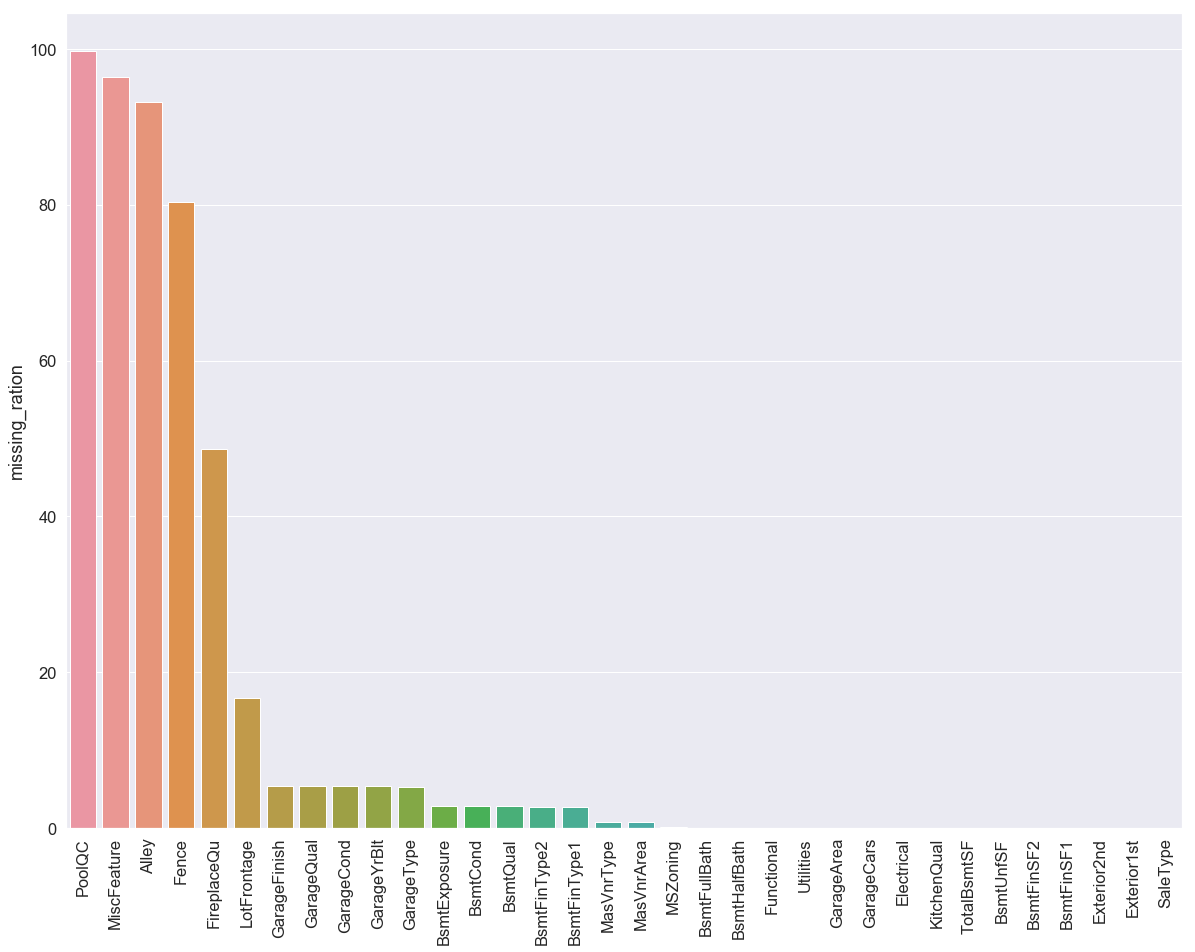

In [53]:
plt.figure(figsize=(20,15))
sns.barplot(x=details_nan.index,y=details_nan.missing_ration)
plt.xticks(rotation='90')

In [54]:
#poolqc: filling none because nan probably implies no pool in the house

dataset['PoolQC'] = dataset['PoolQC'].fillna("None")

In [55]:
#MiscFeature: filling none because nan probably implies no MiscFeature in the house

dataset['MiscFeature'] = dataset['MiscFeature'].fillna("None")

In [56]:
#Alley: filling none because nan probably implies no Alleyin the house

dataset['Alley'] = dataset['Alley'].fillna("None")

In [57]:
#Fence: filling none because nan probably implies no Fence in the house

dataset['Fence'] = dataset['Fence'].fillna("None")

In [58]:
x=dataset[['Fireplaces','FireplaceQu']]
x.loc[x['Fireplaces']==0]

#it is clear that for 0 fireplace ther quality values iS nan, so fil with none

dataset['FireplaceQu']=dataset['FireplaceQu'].fillna('None')

In [59]:
#dataset['LotFrontage'].value_counts()
#x= dataset[['LotFrontage','Neighborhood','SalePrice']]
#y= x.groupby('Neighborhood')['LotFrontage'].median()
#ataset['LotFRontage']= dataset.groupby('Neighborhood')['LotFRontage'].transform(lambda i : i.fillna(i.median()))

In [60]:
#LotFrontage: filling lotfrontage taking median of the neighborhood values
dataset['LotFrontage']= dataset.groupby('Neighborhood')['LotFrontage'].transform(lambda i : i.fillna(i.median()))

In [61]:
#details = analysis(dataset,'SalePrice')

#cat_details = details[details['types']=='object']
#details_nan = details[details['nulls']> 0]
#details_nan=details_nan.sort_values(by='missing_ration',ascending=False)
#display(details_nan)

In [62]:
x=dataset[['GarageCond','GarageQual','GarageYrBlt','GarageFinish','GarageArea','GarageCars']]
is_NaN = x.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = x[row_has_NaN]
print(rows_with_NaN)
#it is clear that nan values are similar for all columns

     GarageCond GarageQual  GarageYrBlt GarageFinish  GarageArea  GarageCars
39          NaN        NaN          nan          NaN       0.000       0.000
48          NaN        NaN          nan          NaN       0.000       0.000
78          NaN        NaN          nan          NaN       0.000       0.000
88          NaN        NaN          nan          NaN       0.000       0.000
89          NaN        NaN          nan          NaN       0.000       0.000
99          NaN        NaN          nan          NaN       0.000       0.000
108         NaN        NaN          nan          NaN       0.000       0.000
125         NaN        NaN          nan          NaN       0.000       0.000
127         NaN        NaN          nan          NaN       0.000       0.000
140         NaN        NaN          nan          NaN       0.000       0.000
148         NaN        NaN          nan          NaN       0.000       0.000
155         NaN        NaN          nan          NaN       0.000       0.000

In [63]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    dataset[col] = dataset[col].fillna('None')

In [64]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)

In [65]:
#details = analysis(dataset,'SalePrice')

#cat_details = details[details['types']=='object']
#details_nan = details[details['nulls']> 0]
#details_nan=details_nan.sort_values(by='missing_ration',ascending=False)
#display(details_nan)

In [66]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col] = dataset[col].fillna(0)

In [67]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

In [68]:
dataset["MasVnrType"] = dataset["MasVnrType"].fillna("None")
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)


In [69]:
dataset['MSZoning'].value_counts()
dataset['MSZoning']= dataset['MSZoning'].fillna(dataset['MSZoning'].mode()[0])

In [70]:
dataset['Functional'].value_counts()
dataset['Functional']= dataset['Functional'].fillna(dataset['Functional'].mode()[0])

In [71]:
dataset = dataset.drop(['Utilities'], axis=1)

In [72]:
#details = analysis(dataset,'SalePrice')

#cat_details = details[details['types']=='object']
#details_nan = details[details['nulls']> 0]
#details_nan=details_nan.sort_values(by='missing_ration',ascending=False)
#display(details_nan)

In [73]:
#dataset['Exterior1st'].value_counts()
dataset['Exterior1st']= dataset['Exterior1st'].fillna(dataset['Exterior1st'].mode()[0])
dataset['Exterior2nd']= dataset['Exterior2nd'].fillna(dataset['Exterior2nd'].mode()[0])

In [74]:
dataset['Electrical'].value_counts()
dataset['Electrical']= dataset['Electrical'].fillna(dataset['Electrical'].mode()[0])

In [75]:
dataset['KitchenQual']= dataset['KitchenQual'].fillna(dataset['KitchenQual'].mode()[0])
dataset['SaleType']= dataset['SaleType'].fillna(dataset['SaleType'].mode()[0])

In [76]:
#details = analysis(dataset,'SalePrice')

#cat_details = details[details['types']=='object']
#details_nan = details[details['nulls']> 0]
#details_nan=details_nan.sort_values(by='missing_ration',ascending=False)
#display(details_nan)

In [77]:
# no more null values

## Create New Features

In [78]:
# discussed in EDA
dataset['GarageCars*Area'] = dataset['GarageCars']*dataset['GarageArea']


In [79]:
dataset['TotalSF'] = dataset['TotalBsmtSF'] + dataset['1stFlrSF'] + dataset['2ndFlrSF']

In [80]:
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
dataset['OverallCond'] = dataset['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
dataset['YrSold'] = dataset['YrSold'].astype(str)
dataset['MoSold'] = dataset['MoSold'].astype(str)

In [81]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(dataset[c].values)) 
    dataset[c] = lbl.transform(list(dataset[c].values))

# shape        
print('Shape all_data: {}'.format(dataset.shape))

Shape all_data: (2911, 80)


In [82]:
'''
def one_hot_encode(df):
    categorical_cols = df.select_dtypes(include=['object']).columns

    print(len(categorical_cols), "categorical columns")
    print(categorical_cols)
 
    for col in categorical_cols:
        df[col] = df[col].str.replace('\W', '').str.replace(' ', '_') #.str.lower()

    dummies = pd.get_dummies(df[categorical_cols], columns = categorical_cols).columns
    df = pd.get_dummies(df, columns = categorical_cols)

    print("Total Columns:",len(df.columns))
    print(df.info())
    
    return df, dummies
'''

'\ndef one_hot_encode(df):\n    categorical_cols = df.select_dtypes(include=[\'object\']).columns\n\n    print(len(categorical_cols), "categorical columns")\n    print(categorical_cols)\n \n    for col in categorical_cols:\n        df[col] = df[col].str.replace(\'\\W\', \'\').str.replace(\' \', \'_\') #.str.lower()\n\n    dummies = pd.get_dummies(df[categorical_cols], columns = categorical_cols).columns\n    df = pd.get_dummies(df, columns = categorical_cols)\n\n    print("Total Columns:",len(df.columns))\n    print(df.info())\n    \n    return df, dummies\n'

In [83]:
#one_hot_encode(dataset)

# handle skew data

In [84]:
#details = analysis(dataset,'SalePrice')
#display(details.sort_values(by='skewness',ascending=True))

In [85]:
skew_data=details[abs(details['skewness'])> 0.5]
#skew_data=details[details['skewness']>0.5]
skew_data #highlyskewed data

types  counts  \
MSSubClass       int64    2911   
LotFrontage    float64    2426   
LotArea          int64    2911   
OverallCond      int64    2911   
YearBuilt        int64    2911   
MasVnrArea     float64    2888   
BsmtFinSF1     float64    2910   
BsmtFinSF2     float64    2910   
BsmtUnfSF      float64    2910   
TotalBsmtSF    float64    2910   
1stFlrSF         int64    2911   
2ndFlrSF         int64    2911   
LowQualFinSF     int64    2911   
GrLivArea        int64    2911   
BsmtFullBath   float64    2909   
BsmtHalfBath   float64    2909   
HalfBath         int64    2911   
KitchenAbvGr     int64    2911   
TotRmsAbvGrd     int64    2911   
Fireplaces       int64    2911   
WoodDeckSF       int64    2911   
OpenPorchSF      int64    2911   
EnclosedPorch    int64    2911   
3SsnPorch        int64    2911   
ScreenPorch      int64    2911   
PoolArea         int64    2911   
MiscVal          int64    2911   

                                                         uniques  nulls  \
MSSubClass     [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...      0   
LotFrontage    [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...    485   
LotArea        [8450, 9600, 11250, 9550, 14260, 14115, 10084,...      0   
OverallCond                          [5, 8, 6, 7, 4, 2, 3, 9, 1]      0   
YearBuilt      [2003, 1976, 2001, 1915, 2000, 1993, 2004, 197...      0   
MasVnrArea     [196.0, 0.0, 162.0, 350.0, 186.0, 240.0, 286.0...     23   
BsmtFinSF1     [706.0, 978.0, 486.0, 216.0, 655.0, 732.0, 136...      1   
BsmtFinSF2     [0.0, 32.0, 668.0, 486.0, 93.0, 491.0, 506.0, ...      1   
BsmtUnfSF      [150.0, 284.0, 434.0, 540.0, 490.0, 64.0, 317....      1   
TotalBsmtSF    [856.0, 1262.0, 920.0, 756.0, 1145.0, 796.0, 1...      1   
1stFlrSF       [856, 1262, 920, 961, 1145, 796, 1694, 1107, 1...      0   
2ndFlrSF       [854, 0, 866, 756, 1053, 566, 983, 752, 1142, ...      0   
LowQualFinSF   [0, 360, 513, 234, 528, 572, 144, 392, 371, 39...      0   
GrLivArea      [1710, 1262, 1786, 1717, 2198, 1362, 1694, 209...      0   
BsmtFullBath                           [1.0, 0.0, 2.0, 3.0, nan]      2   
BsmtHalfBath                                [0.0, 1.0, 2.0, nan]      2   
HalfBath                                               [1, 0, 2]      0   
KitchenAbvGr                                        [1, 2, 3, 0]      0   
TotRmsAbvGrd    [8, 6, 7, 9, 5, 11, 4, 10, 12, 3, 2, 14, 13, 15]      0   
Fireplaces                                       [0, 1, 2, 3, 4]      0   
WoodDeckSF     [0, 298, 192, 40, 255, 235, 90, 147, 140, 160,...      0   
OpenPorchSF    [61, 0, 42, 35, 84, 30, 57, 204, 4, 21, 33, 21...      0   
EnclosedPorch  [0, 272, 228, 205, 176, 87, 172, 102, 37, 144,...      0   
3SsnPorch      [0, 320, 407, 130, 180, 168, 140, 508, 238, 24...      0   
ScreenPorch    [0, 176, 198, 291, 252, 99, 184, 168, 130, 142...      0   
PoolArea       [0, 512, 648, 576, 555, 519, 738, 144, 368, 44...      0   
MiscVal        [0, 700, 350, 500, 400, 480, 450, 15500, 1200,...      0   

               distincts  missing_ration  skewness  kurtosis  corr SalePrice  
MSSubClass            16           0.000     1.377     1.459          -0.010  
LotFrontage          128          16.661     1.125     7.400           0.038  
LotArea             1947           0.000    13.162   276.920           0.051  
OverallCond            9           0.000     0.569     1.481           0.010  
YearBuilt            118           0.000    -0.599    -0.512           0.018  
MasVnrArea           442           0.790     2.614     9.390           0.020  
BsmtFinSF1           989           0.034     0.984     1.444           0.011  
BsmtFinSF2           272           0.034     4.141    18.774          -0.017  
BsmtUnfSF           1134           0.034     0.916     0.388           0.022  
TotalBsmtSF         1055           0.034     0.678     3.731           0.027  
1stFlrSF            1080           0.000     1.261     5.096           0.022  
2ndFlrSF       

In [86]:
print("There are {} skewed numerical features to Box Cox transform".format(skew_data.shape[0]))

from scipy.special import boxcox1p
skewed_features = skew_data.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    dataset[feat] = boxcox1p(dataset[feat], lam)
    

There are 27 skewed numerical features to Box Cox transform


In [104]:
details = analysis(train,'SalePrice')
details

types  counts  \
MSSubClass       int64    1452   
MSZoning        object    1452   
LotFrontage    float64    1194   
LotArea          int64    1452   
Street          object    1452   
Alley           object      91   
LotShape        object    1452   
LandContour     object    1452   
Utilities       object    1452   
LotConfig       object    1452   
LandSlope       object    1452   
Neighborhood    object    1452   
Condition1      object    1452   
Condition2      object    1452   
BldgType        object    1452   
HouseStyle      object    1452   
OverallQual      int64    1452   
OverallCond      int64    1452   
YearBuilt        int64    1452   
YearRemodAdd     int64    1452   
RoofStyle       object    1452   
RoofMatl        object    1452   
Exterior1st     object    1452   
Exterior2nd     object    1452   
MasVnrType      object    1444   
MasVnrArea     float64    1444   
ExterQual       object    1452   
ExterCond       object    1452   
Foundation      object    1452   
BsmtQual        object    1415   
...                ...     ...   
BedroomAbvGr     int64    1452   
KitchenAbvGr     int64    1452   
KitchenQual     object    1452   
TotRmsAbvGrd     int64    1452   
Functional      object    1452   
Fireplaces       int64    1452   
FireplaceQu     object     766   
GarageType      object    1373   
GarageYrBlt    float64    1373   
GarageFinish    object    1373   
GarageCars       int64    1452   
GarageArea       int64    1452   
GarageQual      object    1373   
GarageCond      object    1373   
PavedDrive      object    1452   
WoodDeckSF       int64    1452   
OpenPorchSF      int64    1452   
EnclosedPorch    int64    1452   
3SsnPorch        int64    1452   
ScreenPorch      int64    1452   
PoolArea         int64    1452   
PoolQC          object       6   
Fence           object     280   
MiscFeature     object      53   
MiscVal          int64    1452   
MoSold           int64    1452   
YrSold           int64    1452   
SaleType        object    1452   
SaleCondition   object    1452   
SalePrice      float64    1452   

                                                         uniques  nulls  \
MSSubClass     [60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,...      0   
MSZoning                               [RL, RM, C (all), FV, RH]      0   
LotFrontage    [65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan...    258   
LotArea        [8450, 9600, 11250, 9550, 14260, 14115, 10084,...      0   
Street                                              [Pave, Grvl]      0   
Alley                                          [nan, Grvl, Pave]   1361   
LotShape                                    [Reg, IR1, IR2, IR3]      0   
LandContour                                 [Lvl, Bnk, Low, HLS]      0   
Utilities                                       [AllPub, NoSeWa]      0   
LotConfig                    [Inside, FR2, Corner, CulDSac, FR3]      0   
LandSlope                                        [Gtl, Mod, Sev]      0   
Neighborhood   [CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...      0   
Condition1     [Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...      0   
Condition2     [Norm, Artery, RRNn, Feedr, PosA, PosN, RRAn, ...      0   
BldgType                   [1Fam, 2fmCon, Duplex, TwnhsE, Twnhs]      0   
HouseStyle     [2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...      0   
OverallQual                      [7, 6, 8, 5, 9, 4, 10, 3, 1, 2]      0   
OverallCond                          [5, 8, 6, 7, 4, 2, 3, 9, 1]      0   
YearBuilt      [2003, 1976, 2001, 1915, 2000, 1993, 2004, 197...      0   
YearRemodAdd   [2003, 1976, 2002, 1970, 2000, 1995, 2005, 197...      0   
RoofStyle             [Gable, Hip, Gambrel, Mansard, Flat, Shed]      0   
RoofMatl       [CompShg, WdShngl, Metal, WdShake, Membran, Ta...      0   
Exterior1st    [VinylSd, MetalSd, Wd Sdng, HdBoard, BrkFace, ...      0   
Exterior2nd    [VinylSd, MetalSd, Wd Shng, HdBoard, Plywood, ...      0   
MasVnrType                   [Brk

In [87]:
dataset = pd.get_dummies(dataset)
print(dataset.shape)


(2911, 221)


In [88]:
dataset.head()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
0       2.886        5.831   19.212       1      1         3          0   
1       2.056        6.221   19.712       1      1         3          0   
2       2.886        5.915   20.347       1      1         0          0   
3       3.011        5.685   19.692       1      1         0          0   
4       2.886        6.315   21.325       1      1         0          0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0            7        1.820     14.188          2003       8.059          2   
1            6        2.440     14.145          1976       0.000          3   
2            7        1.820     14.184          2002       7.647          2   
3            7        1.820     14.048          1970       0.000          3   
4            8        1.820     14.183          2000       9.392          2   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          4         2         4             3             2      11.170   
1          4         2         4             1             0      12.063   
2          4         2         4             2             2      10.200   
3          4         4         1             3             0       8.274   
4          4         2         4             0             2      10.971   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0             6       0.000      7.483       11.693          0           1   
1             6       0.000      8.898       12.792          0           1   
2             6       0.000      9.917       11.892          0           1   
3             6       0.000     10.468       11.354          2           1   
4             6       0.000     10.221       12.511          0           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    11.693    11.686         0.000     13.699         0.730         0.000   
1    12.792     0.000         0.000     12.792         0.000         0.730   
2    11.892    11.725         0.000     13.832         0.730         0.000   
3    12.014    11.354         0.000     13.711         0.730         0.000   
4    12.511    12.271         0.000     14.480         0.730         0.000   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2     0.730             3         0.730            2         2.603   
1         2     0.000             3         0.730            3         2.260   
2         2     0.730             3         0.730            2         2.260   
3         1     0.000             3         0.730            2         2.440   
4         2     0.730             4         0.730            2         2.750   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0           6       0.000            3     2003.000             2       2.000   
1           6       0.730            5     1976.000             2       2.000   
2           6       0.730            5     2001.000             2       2.000   
3           6       0.730            2     1998.000             3       3.000   
4           6       0.730            5     2000.000             2       3.000   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0     548.000           5           5           2       0.000        5.715   
1     460.000           5           5           2       9.010        0.000   
2     608.000           5           5           2       0.000        5.053   
3     642.000           5           5           2       0.000        4.745   
4     836.000           5           5           2       8.014        6.315   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0          0.000      0.000        0.000     0.000       3      4    0.000   
1          0.000      0.000        0.000     0.000       3      4    0.000   
2          

In [89]:
train_df = dataset[:ntrain]
test_df = dataset[ntrain:]
train_df.head()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
0       2.886        5.831   19.212       1      1         3          0   
1       2.056        6.221   19.712       1      1         3          0   
2       2.886        5.915   20.347       1      1         0          0   
3       3.011        5.685   19.692       1      1         0          0   
4       2.886        6.315   21.325       1      1         0          0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0            7        1.820     14.188          2003       8.059          2   
1            6        2.440     14.145          1976       0.000          3   
2            7        1.820     14.184          2002       7.647          2   
3            7        1.820     14.048          1970       0.000          3   
4            8        1.820     14.183          2000       9.392          2   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          4         2         4             3             2      11.170   
1          4         2         4             1             0      12.063   
2          4         2         4             2             2      10.200   
3          4         4         1             3             0       8.274   
4          4         2         4             0             2      10.971   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0             6       0.000      7.483       11.693          0           1   
1             6       0.000      8.898       12.792          0           1   
2             6       0.000      9.917       11.892          0           1   
3             6       0.000     10.468       11.354          2           1   
4             6       0.000     10.221       12.511          0           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    11.693    11.686         0.000     13.699         0.730         0.000   
1    12.792     0.000         0.000     12.792         0.000         0.730   
2    11.892    11.725         0.000     13.832         0.730         0.000   
3    12.014    11.354         0.000     13.711         0.730         0.000   
4    12.511    12.271         0.000     14.480         0.730         0.000   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2     0.730             3         0.730            2         2.603   
1         2     0.000             3         0.730            3         2.260   
2         2     0.730             3         0.730            2         2.260   
3         1     0.000             3         0.730            2         2.440   
4         2     0.730             4         0.730            2         2.750   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0           6       0.000            3     2003.000             2       2.000   
1           6       0.730            5     1976.000             2       2.000   
2           6       0.730            5     2001.000             2       2.000   
3           6       0.730            2     1998.000             3       3.000   
4           6       0.730            5     2000.000             2       3.000   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0     548.000           5           5           2       0.000        5.715   
1     460.000           5           5           2       9.010        0.000   
2     608.000           5           5           2       0.000        5.053   
3     642.000           5           5           2       0.000        4.745   
4     836.000           5           5           2       8.014        6.315   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0          0.000      0.000        0.000     0.000       3      4    0.000   
1          0.000      0.000        0.000     0.000       3      4    0.000   
2          

In [90]:
X_train = train_df
#X_train.drop('SalePrice',axis=1,inplace=True)



In [91]:
X_train.head()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
0       2.886        5.831   19.212       1      1         3          0   
1       2.056        6.221   19.712       1      1         3          0   
2       2.886        5.915   20.347       1      1         0          0   
3       3.011        5.685   19.692       1      1         0          0   
4       2.886        6.315   21.325       1      1         0          0   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  \
0            7        1.820     14.188          2003       8.059          2   
1            6        2.440     14.145          1976       0.000          3   
2            7        1.820     14.184          2002       7.647          2   
3            7        1.820     14.048          1970       0.000          3   
4            8        1.820     14.183          2000       9.392          2   

   ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  \
0          4         2         4             3             2      11.170   
1          4         2         4             1             0      12.063   
2          4         2         4             2             2      10.200   
3          4         4         1             3             0       8.274   
4          4         2         4             0             2      10.971   

   BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  CentralAir  \
0             6       0.000      7.483       11.693          0           1   
1             6       0.000      8.898       12.792          0           1   
2             6       0.000      9.917       11.892          0           1   
3             6       0.000     10.468       11.354          2           1   
4             6       0.000     10.221       12.511          0           1   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0    11.693    11.686         0.000     13.699         0.730         0.000   
1    12.792     0.000         0.000     12.792         0.000         0.730   
2    11.892    11.725         0.000     13.832         0.730         0.000   
3    12.014    11.354         0.000     13.711         0.730         0.000   
4    12.511    12.271         0.000     14.480         0.730         0.000   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0         2     0.730             3         0.730            2         2.603   
1         2     0.000             3         0.730            3         2.260   
2         2     0.730             3         0.730            2         2.260   
3         1     0.000             3         0.730            2         2.440   
4         2     0.730             4         0.730            2         2.750   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt  GarageFinish  GarageCars  \
0           6       0.000            3     2003.000             2       2.000   
1           6       0.730            5     1976.000             2       2.000   
2           6       0.730            5     2001.000             2       2.000   
3           6       0.730            2     1998.000             3       3.000   
4           6       0.730            5     2000.000             2       3.000   

   GarageArea  GarageQual  GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  \
0     548.000           5           5           2       0.000        5.715   
1     460.000           5           5           2       9.010        0.000   
2     608.000           5           5           2       0.000        5.053   
3     642.000           5           5           2       0.000        4.745   
4     836.000           5           5           2       8.014        6.315   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  PoolQC  Fence  MiscVal  \
0          0.000      0.000        0.000     0.000       3      4    0.000   
1          0.000      0.000        0.000     0.000       3      4    0.000   
2          

In [92]:
X_test = test_df
X_test.head()

MSSubClass  LotFrontage  LotArea  Street  Alley  LotShape  LandSlope  \
1452       2.056        6.221   20.479       1      1         3          0   
1453       2.056        6.245   21.327       1      1         0          0   
1454       2.886        6.073   21.197       1      1         0          0   
1455       2.886        6.173   19.865       1      1         0          0   
1456       0.000        5.094   17.257       1      1         0          0   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
1452            5        2.056     14.121          1961       0.000   
1453            6        2.056     14.117          1958       6.808   
1454            5        1.820     14.178          1998       0.000   
1455            6        2.056     14.180          1998       3.859   
1456            8        1.820     14.170          1992       0.000   

      ExterQual  ExterCond  BsmtQual  BsmtCond  BsmtExposure  BsmtFinType1  \
1452          3          4         4         4             3             5   
1453          3          4         4         4             3             0   
1454          3          4         2         4             3             2   
1455          3          4         4         4             3             2   
1456          2          4         2         4             3             0   

      BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  HeatingQC  \
1452      10.105             3       7.397      8.781       11.775          4   
1453      11.901             6       0.000      9.752       12.944          4   
1454      11.477             6       0.000      7.294       11.916          2   
1455      10.750             6       0.000      9.208       11.910          0   
1456       8.720             6       0.000     12.173       12.834          0   

      CentralAir  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
1452           1    11.819     0.000         0.000     11.819         0.000   
1453           1    12.944     0.000         0.000     12.944         0.000   
1454           1    11.916    11.151         0.000     13.551         0.000   
1455           1    11.910    11.063         0.000     13.504         0.000   
1456           1    12.834     0.000         0.000     12.834         0.000   

      BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
1452         0.000         1     0.000             2         0.730   
1453         0.000         1     0.730             3         0.730   
1454         0.000         2     0.730             3         0.730   
1455         0.000         2     0.730             3         0.730   
1456         0.000         2     0.000             2         0.730   

      KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  \
1452            3         2.056           6       0.000            3   
1453            2         2.260           6       0.000            3   
1454            3         2.260           6       0.730            5   
1455            2         2.440           6       0.730            2   
1456            2         2.056           6       0.000            3   

      GarageYrBlt  GarageFinish  GarageCars  GarageArea  GarageQual  \
1452     1961.000             3       1.000     730.000           5   
1453     1958.000             3       1.000     312.000           5   
1454     1997.000             0       2.000     482.000           5   
1455     1998.000             0       2.000     470.000           5   
1456     1992.000             2       2.000     506.000           5   

      GarageCond  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
1452           5           2       7.339        0.000          0.000   
1453           5           2       9.673        4.792          0.000   
1454           5           2       8.233        4.697          0.000   
1455           5           2       9.460        4.792          0.000   
1456           5           2       0.0

In [93]:
#y_train = train['SalePrice']#

In [94]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
#import lightgbm as lgb

In [95]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [96]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213,
                             random_state =7, nthread = -1)


In [97]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 21785.8359 (1705.8861)



In [98]:
model_xgb.fit(X_train,y_train)
y_pred= model_xgb.predict(X_test)
y_pred

array([126478.41 , 169904.94 , 193439.47 , ..., 173820.81 , 108930.086,
       217421.52 ], dtype=float32)

In [99]:
y_pred.size

1459

In [100]:
test_Id.shape

(1459,)

In [101]:
sub = pd.DataFrame()
sub['Id'] = test_Id
sub['SalePrice'] = np.around(y_pred)
sub.to_csv('submission.csv',index=False)